<h1 style="text-align: center;">Data 604 Project: Global Impact of Co2 and Greenhouse gases emissions</h1>

# Table of content

1. [Introduction](#Introduction)
2. [Dataset](#Dataset)
3. [Creating SQL Connection](#Creating-SQL-Connection)
4. [Creating Tables, Inserting Data and Data Cleaning](#Creating-Tables,-Inserting-data-and-Cleaning-data)
5. [Guiding Questions](#Guiding-Questions)
	a. [Question 1](#Guiding-Question-1)
	b. [Question 2](#Guiding-Question-2)
	c. [Question 3](#Guiding-Question-3)
	d. [Question 4](#Guiding-Question-4)
	e. [Question 5](#Guiding-Question-5)
6. [Conclusion](#Conclusion)
7. [Feedback](#Feedback)
8. [Future Scope](#Future-Scope)
9. [Discussions](#Discussions)
10. [References](#References)

# Introduction

The global impact of CO₂ and greenhouse gas (GHG) emissions is a pressing issue, given their profound effects on environmental stability and human well-being. These emissions, driven by activities such as energy production, transportation, agriculture, and industrial processes, are significant contributors to climate change and have raised concerns about their impact on life expectancy and quality of life. Understanding the composition, sources, and sectoral contributions of CO₂ and GHG emissions is essential to addressing their effects and guiding future policies.

This report focuses on exploring the patterns and impacts of CO₂ and GHG emissions on a global scale, delving into their variations across different years, countries, and continents. Key questions include: 
- How do emissions differ across continents? Which sectors are the largest contributors to global emissions?
- How have CO₂ and GHG emissions per capita evolved over the decades?
- Most importantly, how are these emissions correlated with life expectancy trends worldwide? 

By analyzing the composition of greenhouse gases, emissions by source, and sectoral contributions, this report provides a comprehensive view of their global footprint. Additionally, it examines the effects of global policies and technological advancements aimed at curbing emissions and their potential to improve societal outcomes.

This study is motivated by the urgent need to understand the long-term implications of emissions on human health and environmental sustainability. The analysis offers insights into the broader impacts of industrial activity, energy consumption, and economic development on life expectancy. The report is structured to guide readers through the exploration, beginning with an overview of emissions data and trends, followed by an investigation of life expectancy correlations, and concluding with key findings and implications. This structured approach ensures clarity and supports a deeper understanding of the complex dynamics between emissions and their global impact.

# Dataset

Project Dataset link[1]: https://ourworldindata.org/data?q=co2&topics=CO2+%26+Greenhouse+Gas+Emissions

- Per capita CO2 emissions: https://ourworldindata.org/grapher/co-emissions-per-capita
- per capita GHG emissions: https://ourworldindata.org/grapher/per-capita-ghg-emissions
- CO2 emissions by source: https://ourworldindata.org/grapher/co2-by-source?time=earliest..2022
- GHG by sector: https://ourworldindata.org/grapher/ghg-emissions-by-sector-stacked
- GHG composition: https://ourworldindata.org/grapher/ghg-emissions-by-gas
- Life Expectancy: https://ourworldindata.org/grapher/life-expectancy-at-birth-vs-co-emissions-per-capita?tab=table

#### Dataset license

The datasets are from an open-access publication, ‘Our World in Data’. The data is licensed under the Creative Commons license, it is subject to the license terms from the original third-party authors. We are permitted to use, distribute, and reproduce these in any medium, provided the source and authors are credited.

There are 6 csv files we got from the open source, each file works as a table. A new column is created with the conctaenation of Code anf Year column and is named as Code_Year, which works as the primary key for all the tables. The list of the tables are:

| **Dataset Name**      | **Dimensions**  | **Contributors**                            |
|-----------------------|-----------------|---------------------------------------------|
| `per_capita_ghg`      | 4 x 36512       | Satyam Kapoor, Arshdeep Kaur               |
| `per_capita_co2`      | 4 x 26602       | Satyam Kapoor, Arshdeep Kaur               |
| `life_expectancy`     | 6 x 19036       | Satyam Kapoor, Maharsh Khamar, Prabhnoor Virk |
| `ghg_sector`          | 14 x 6356       | Hritvik Gaind, Prabhnoor Virk              |
| `ghg_comp`            | 6 x 41521       | Maharsh Khamar                             |
| `co2_emissions`       | 9 x 28579       | Hritvik Gaind, Prabhnoor Virk              |

The relationship between the tables are advertised using the `ER Diagram` and is attached with the report.

# Creating SQL Connection

In [7]:
import mysql.connector
from mysql.connector import Error
import csv


USERNAME='student'
PASSWORD="LcfJs4qQ5NQ5e"

In [8]:
connection = mysql.connector.connect(
            host='localhost',
            user='student',
            password=PASSWORD,
            database="student"
        )
cursor=connection.cursor()

if connection.is_connected():
        print("Connected to MySQL")
        cursor = connection.cursor()
        cursor.execute('SHOW DATABASES')
        databases = cursor.fetchall()
        for database in databases:
            print(database)
else:
    print("Error while connecting to MySQL")

Connected to MySQL
('information_schema',)
('student',)


# Creating Tables, Inserting data and Cleaning data

#### Dataset 1: CO2 emissions by source

Creating the co2_emissions table in the database, which will be used to store and query data on CO₂ emissions by source for further analysis.

In [9]:
def create_table_co2_by_source(db_name):
    
    # Check if any of the table exists, if the table exists then drop the table
    cursor.execute(f"SHOW TABLES LIKE 'co2_emissions'")
    result = cursor.fetchone()
            
    if result:
        cursor.execute(f"DROP TABLE co2_emissions")

    
    # creating table CO2 by source
        
    create_table_CO2_Emissions_query = f"""
        CREATE TABLE co2_emissions(
            Entity CHAR(200),
            Code CHAR(200),
            Year VARCHAR(10),
            CO2_emissions_from_other_industry VARCHAR(100),
            CO2_emissions_from_flaring VARCHAR(100),
            CO2_emissions_from_cement VARCHAR(100),
            CO2_emissions_from_gas VARCHAR(100),
            CO2_emissions_from_oil VARCHAR(100),
            CO2_emissions_from_coal VARCHAR(100)         
            );
        """
    cursor.execute(create_table_CO2_Emissions_query)
    print("Table 'co2_emissions' created successfully.")
    
    connection.commit()
                

create_table_co2_by_source("student")

Table 'co2_emissions' created successfully.


Inserting data into the co2_emissions table from a CSV file to enable efficient querying and analysis of CO₂ emissions by source.

In [10]:
# inserting data

def insert_data_co2_by_source(db_name, table_name, csv_file_path):
    
    
    insert_query = f"""INSERT INTO {table_name} 
                    (Entity, Code, Year, CO2_emissions_from_other_industry, CO2_emissions_from_flaring, CO2_emissions_from_cement, CO2_emissions_from_gas, CO2_emissions_from_oil, CO2_emissions_from_coal)
                    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s);
                """           
    with open(csv_file_path, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)
                
        for row in csv_reader:
            cursor.execute(insert_query, tuple(row))

        
    connection.commit()
    print("Data inserted successfully.")
    

insert_data_co2_by_source("student", "co2_emissions", "CO2 by source.csv")

Data inserted successfully.


In [11]:
def update_and_clean_data(db_name, table_name):
    
    cleaning_queries = [
        f"UPDATE {table_name} SET CO2_emissions_from_other_industry = 0 WHERE CO2_emissions_from_other_industry = '' OR CO2_emissions_from_other_industry IS NULL",
        f"UPDATE {table_name} SET CO2_emissions_from_flaring = 0 WHERE CO2_emissions_from_flaring = '' OR CO2_emissions_from_flaring IS NULL",
        f"UPDATE {table_name} SET CO2_emissions_from_cement = 0 WHERE CO2_emissions_from_cement = '' OR CO2_emissions_from_cement IS NULL",
        f"UPDATE {table_name} SET CO2_emissions_from_gas = 0 WHERE CO2_emissions_from_gas = '' OR CO2_emissions_from_gas IS NULL",
        f"UPDATE {table_name} SET CO2_emissions_from_oil = 0 WHERE CO2_emissions_from_oil = '' OR CO2_emissions_from_oil IS NULL",
        f"UPDATE {table_name} SET CO2_emissions_from_coal = 0 WHERE CO2_emissions_from_coal = '' OR CO2_emissions_from_coal IS NULL",
        f"UPDATE {table_name} SET Code = SUBSTRING(Entity, 1, 3) WHERE Code = '' OR Code IS NULL",
        f"DELETE FROM {table_name} WHERE Entity IN ('Asia','Asia (excl. China and India)','Europe',"
        f"'Europe (excl. EU-27)','Europe (excl. EU-28)','European Union (27)','European Union (28)','High-income countries',"
        f"'International aviation','International shipping','Low-income countries','Lower-middle-income countries',"
        f"'North America','North America (excl. USA)','Upper-middle-income countries','World')",
        f"ALTER TABLE {table_name} ADD COLUMN Code_Year VARCHAR(255)",
        f"UPDATE {table_name} SET Code_Year = CONCAT(Code,'_', Year)"
    ]
    
    for queries in cleaning_queries:
        cursor.execute(queries)
    connection.commit()

    cursor.execute('''
    ALTER TABLE co2_emissions 
    MODIFY CO2_emissions_from_other_industry FLOAT,
    MODIFY CO2_emissions_from_flaring FLOAT,
    MODIFY CO2_emissions_from_coal FLOAT,
    MODIFY CO2_emissions_from_gas FLOAT,
    MODIFY CO2_emissions_from_oil FLOAT,
    MODIFY CO2_emissions_from_cement FLOAT;
    ''')


    connection.commit()
            
    print("Data has been updated successfully.")
    

update_and_clean_data("student", "co2_emissions")


Data has been updated successfully.


The `update_and_clean_data` function is used to clean and preprocess the data in the `co2_emissions` table by addressing missing or incorrect values.

- Empty or null values in emission columns (e.g., CO2_emissions_from_other_industry, CO2_emissions_from_flaring, etc.) are updated to `0` for accurate analysis.
- The `Code` field is updated by extracting the first three characters from the Entity column where Code is missing.
- Rows representing aggregate data (e.g., "World", "Asia") are deleted to focus on country-specific data.
- A new column `Code_Year` is added by concatenating the Code and Year columns, providing a unique identifier for each record.
- 
This cleaning process ensures that the dataset is consistent and ready for analysis.


#### Dataset 2: greenhouse gases emissions per capita 

Creating the per_capita_ghg table in the database, which will be used to store and query data on greenhouse gas emissions per  capita for further analysis.

In [12]:
def create_table_ghg_per_capita(db_name):
    
    # Check if any of the table exists, if the table exists then drop the table
    cursor.execute(f"SHOW TABLES LIKE 'per_capita_ghg'")
    result = cursor.fetchone()
            
    if result:
        cursor.execute(f"DROP TABLE per_capita_ghg")

    
    # creating table ghg_emissions_per_capita
        
    create_table_ghg_emissions_query = f"""
        Create table per_capita_ghg(
            Entity Varchar(100),
            Code Varchar(10),
            Year int(10),
            Per_capita_greenhouse_gas_emissions Varchar(50)
            );
        """
    cursor.execute(create_table_ghg_emissions_query)
    print("Table 'per_capita_ghg' created successfully.")
    
    connection.commit()
                

create_table_ghg_per_capita("student")

Table 'per_capita_ghg' created successfully.


Inserting data into the per_capita_ghg table from a CSV file to enable efficient querying and analysis of greenhouse gas emissions per capita.

In [13]:
def insert_data_ghg_per_capita(db_name, table_name, csv_file_path):
    
    COLUMNS = ["Entity","Code","Year","Per_capita_greenhouse_gas_emissions"]
    columnString = "`,`".join(COLUMNS)
        
            
    insert_query = f"INSERT INTO {table_name} (`{columnString}`) VALUES ({','.join(['%s'] * len(COLUMNS))})"
            
    with open(csv_file_path, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)
                
        for row in csv_reader:
            cursor.execute(insert_query, tuple(row))
            
    connection.commit()
    print("Data inserted successfully.")
    
insert_data_ghg_per_capita("student", "per_capita_ghg", "per-capita-ghg-emissions.csv")

Data inserted successfully.


In [14]:
# cleaning of data
def clean_GHG_per_capita_data(db_name, table_name, csv_file_path):
    print_null_query=f"""
        SELECT 
            COUNT(*) as total_rows,
            SUM(CASE WHEN Entity='' OR Entity IS NULL THEN 1 ELSE 0 END) as entity_nulls,
            SUM(CASE WHEN `Code`='' OR `Code` IS NULL THEN 1 ELSE 0 END) as code_nulls,
            SUM(CASE WHEN `Year`='' OR `Year` IS NULL THEN 1 ELSE 0 END) as year_nulls,
            SUM(CASE WHEN `Per_capita_greenhouse_gas_emissions`='' OR `Per_capita_greenhouse_gas_emissions` IS NULL OR `Per_capita_greenhouse_gas_emissions`<0 THEN 1 ELSE 0 END) as GHG_emissions_nulls
        FROM {table_name};
    """
    cursor.execute(print_null_query)
    null_data=cursor.fetchall()
    columns = ["total_rows", "entity_nulls", "code_nulls", "year_nulls", "GHG_emissions_nulls"]

    for i, col_name in enumerate(columns):
        print(f"{col_name}: {null_data[0][i]}")

    clean_queries = [
        f"UPDATE {table_name} SET `Per_capita_greenhouse_gas_emissions` = 0 WHERE `Per_capita_greenhouse_gas_emissions`='' OR `Per_capita_greenhouse_gas_emissions` IS NULL;",
        f"UPDATE {table_name} SET `Per_capita_greenhouse_gas_emissions` = ABS(Per_capita_greenhouse_gas_emissions) WHERE `Per_capita_greenhouse_gas_emissions`<0;",
        f"UPDATE {table_name} SET `Code` = UPPER(SUBSTRING(`Entity`, 1, 3)) WHERE `Code`='' OR `Code` IS NULL;",
        f"ALTER TABLE {table_name} ADD COLUMN Code_Year VARCHAR(255)",
        f"UPDATE {table_name} SET Code_Year = CONCAT(Code,'_', Year)",
        f"ALTER TABLE {table_name} MODIFY COLUMN Per_capita_greenhouse_gas_emissions FLOAT;"
        ]

    for query in clean_queries:
        cursor.execute(query)
            
    connection.commit()

    cursor.execute(print_null_query)
    null_data_updated=cursor.fetchall()
    print(null_data_updated)

    print("Data has been updated successfully.")
          
            
clean_GHG_per_capita_data("student", "per_capita_ghg", "per-capita-ghg-emissions.csv")

total_rows: 35611
entity_nulls: 0
code_nulls: 1903
year_nulls: 0
GHG_emissions_nulls: 197
[(35611, Decimal('0'), Decimal('0'), Decimal('0'), Decimal('0'))]
Data has been updated successfully.


The `clean_GHG_per_capita_data` function is used to clean and preprocess the data in the `per_capita_ghg` table to ensure data integrity and consistency.

- Empty or null values in the Per_capita_greenhouse_gas_emissions column are updated to 0 for accurate analysis.
- Negative emission values in the Per_capita_greenhouse_gas_emissions column are converted to positive values.
- The `Code` field is updated by extracting the first three characters from the Entity column where Code is missing or empty, ensuring consistency in country codes.
- A new column `Code_Year` is created by concatenating the Code and Year columns, providing a unique identifier for each record, which will aid in future analysis.
- The `Per_capita_greenhouse_gas_emissions` column is modified to the FLOAT data type to ensure it can hold numeric values.

This cleaning process ensures that the dataset is consistent, standardized, and ready for further analysis on per capita greenhouse gas emissions.


#### Dataset 3: CO2 emissions per capita

Creating the per_capita_co2 table in the database, which will be used to store and query data on per capita CO₂ emissions for further analysis.

In [15]:
def create_table_co2_per_capita(db_name):
    
    # Check if any of the table exists, if the table exists then drop the table
    cursor.execute(f"SHOW TABLES LIKE 'per_capita_co2'")
    result = cursor.fetchone()
            
    if result:
        cursor.execute(f"DROP TABLE per_capita_co2")

    
    # creating table co2_emissions_per_capita
        
    create_table_CO2_Emissions_query = f"""
        Create table per_capita_co2(
            Entity Varchar(100),
            Code Varchar(10),
            Year int(10),
            Per_capita_co2_emissions Varchar(50)
            );
        """
    cursor.execute(create_table_CO2_Emissions_query)
    print("Table 'per_capita_co2' created successfully.")
    
    connection.commit()
                

create_table_co2_per_capita("student")

Table 'per_capita_co2' created successfully.


Inserting data into the per_capita_co2 table from a CSV file to enable efficient querying and analysis of per capita CO₂ emissions.

In [16]:
def insert_data_co2_per_capita(db_name, table_name, csv_file_path):
    
    COLUMNS = ["Entity","Code","Year","Per_capita_co2_emissions"]
    columnString = "`,`".join(COLUMNS)
        
            
    insert_query = f"INSERT INTO {table_name} (`{columnString}`) VALUES ({','.join(['%s'] * len(COLUMNS))})"
            
    with open(csv_file_path, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)
                
        for row in csv_reader:
            cursor.execute(insert_query, tuple(row))
            
    connection.commit()
    print("Data inserted successfully.")
    
insert_data_co2_per_capita("student", "per_capita_co2", "per-capita-CO2-emissions.csv")

Data inserted successfully.


In [17]:
# cleaning of data
def clean_CO2_emissions_data(db_name, table_name, csv_file_path):
    print_null_query=f"""
        SELECT 
            COUNT(*) as total_rows,
            SUM(CASE WHEN Entity='' OR Entity IS NULL THEN 1 ELSE 0 END) as entity_nulls,
            SUM(CASE WHEN `Code`='' OR `Code` IS NULL THEN 1 ELSE 0 END) as code_nulls,
            SUM(CASE WHEN `Year`='' OR `Year` IS NULL THEN 1 ELSE 0 END) as year_nulls,
            SUM(CASE WHEN `Per_capita_co2_emissions`='' OR `Per_capita_co2_emissions` IS NULL OR `Per_capita_co2_emissions`<0 THEN 1 ELSE 0 END) as CO2_emissions_nulls
        FROM {table_name};
    """
    cursor.execute(print_null_query)
    null_data=cursor.fetchall()
    columns = ["total_rows", "entity_nulls", "code_nulls", "year_nulls", "CO2_emissions_nulls"]

    for i, col_name in enumerate(columns):
        print(f"{col_name}: {null_data[0][i]}")

    clean_queries = [
        f"UPDATE {table_name} SET `Per_capita_co2_emissions` = 0 WHERE `Per_capita_co2_emissions`='' OR `Per_capita_co2_emissions` IS NULL OR `Per_capita_co2_emissions`<0;",
        f"UPDATE {table_name} SET `Code` = UPPER(SUBSTRING(`Entity`, 1, 3)) WHERE `Code`='' OR `Code` IS NULL;",
        f"ALTER TABLE {table_name} ADD COLUMN Code_Year VARCHAR(255)",
        f"UPDATE {table_name} SET Code_Year = CONCAT(Code,'_', Year)",
        f"ALTER TABLE {table_name} MODIFY COLUMN Per_capita_co2_emissions FLOAT;"
    ]

    for query in clean_queries:
        cursor.execute(query)
            
    connection.commit()

    cursor.execute(print_null_query)
    null_data_updated=cursor.fetchall()
    print(null_data_updated)

    print("Data inserted successfully.")
    
            
clean_CO2_emissions_data("student", "per_capita_co2", "project/per-capita-CO2-emissions.csv")

total_rows: 26600
entity_nulls: 0
code_nulls: 3554
year_nulls: 0
CO2_emissions_nulls: 0
[(26600, Decimal('0'), Decimal('0'), Decimal('0'), Decimal('2178'))]
Data inserted successfully.


The `clean_CO2_emissions_data` function is used to clean and preprocess the data in the per_capita_co2 table to ensure data integrity and consistency.

- Empty or null values in the Per_capita_co2_emissions column are updated to 0 for accurate analysis.
- Any negative values in the Per_capita_co2_emissions column are converted to positive values, ensuring that all emission data is valid.
- The `Code` field is updated by extracting the first three characters from the Entity column where Code is missing or empty, ensuring consistency in country codes.
- A new column `Code_Year` is created by concatenating the Code and Year columns, providing a unique identifier for each record, which will aid in future analysis.
- The `Per_capita_co2_emissions` column is modified to the FLOAT data type to ensure it can hold numeric values for accurate analysis.

This cleaning process ensures that the dataset is consistent, standardized, and ready for further analysis on per capita CO₂ emissions.


#### Dataset 4: life expectancy

Creating the life_expectancy table in the database, which will be used to store and query data on life expectancy and continent information for further analysis.

In [18]:
def create_table_life_expectancy(db_name):
    
    # Check if any of the table exists, if the table exists then drop the table
    cursor.execute(f"SHOW TABLES LIKE 'life_expectancy'")
    result = cursor.fetchone()
            
    if result:
        cursor.execute(f"DROP TABLE life_expectancy")

    
    # creating table life expectancy 
        
    create_table_life_expectancy_query = f"""
        Create table life_expectancy(
            Entity Varchar(100),
            Code Varchar(10),
            Year int(10),
            Life_Expectancy Varchar(10),
            CO2_Emissions Varchar(100),
            Continent Varchar(100)
            );
        """
    cursor.execute(create_table_life_expectancy_query)
    print("Table 'life_expectancy' created successfully.")
    
    connection.commit()
                

create_table_life_expectancy("student")

Table 'life_expectancy' created successfully.


Inserting data into the life_expectancy table from a CSV file to enable efficient querying and analysis of life expectancy and continent data.

In [19]:
def insert_data_life_expectancy(db_name, table_name, csv_file_path):
    
    COLUMNS = ["Entity","Code","Year","Life_Expectancy","CO2_Emissions","Continent"]
    columnString = "`,`".join(COLUMNS)
        
            
    insert_query = f"INSERT INTO {table_name} (`{columnString}`) VALUES ({','.join(['%s'] * len(COLUMNS))})"
            
    with open(csv_file_path, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)
                
        for row in csv_reader:
            cursor.execute(insert_query, tuple(row))
            
    connection.commit()
    print("Data inserted successfully.")
    
insert_data_life_expectancy("student", "life_expectancy", "life-expectancy-at-birth-vs-co-emissions-per-capita.csv")

Data inserted successfully.


In [20]:
# cleaning of data
def clean_life_expectancy_data(db_name, table_name, csv_file_path):
    print_null_query=f"""
        SELECT 
            COUNT(*) as total_rows,
            SUM(CASE WHEN `Life_Expectancy`='' OR `Life_Expectancy` IS NULL THEN 1 ELSE 0 END) as life_expectancy_nulls,
            SUM(CASE WHEN Entity='' OR Entity IS NULL THEN 1 ELSE 0 END) as entity_nulls,
            SUM(CASE WHEN `Code`='' OR `Code` IS NULL THEN 1 ELSE 0 END) as code_nulls,
            SUM(CASE WHEN `Year`='' OR `Year` IS NULL THEN 1 ELSE 0 END) as year_nulls,
            SUM(CASE WHEN `CO2_Emissions`='' OR `CO2_Emissions` IS NULL THEN 1 ELSE 0 END) as CO2_emissions_nulls,
            SUM(CASE WHEN `Continent`='' OR `Continent` IS NULL THEN 1 ELSE 0 END) as continent_nulls
        FROM {table_name};
    """
    cursor.execute(print_null_query)
    null_data=cursor.fetchall()
    columns = ["total_rows", "entity_nulls", "code_nulls", "year_nulls", "CO2_emissions_nulls"]

    for i, col_name in enumerate(columns):
        print(f"{col_name}: {null_data[0][i]}")

    clean_queries = [
            f"DELETE FROM {table_name} WHERE `Life_Expectancy`='' OR `Life_Expectancy` IS NULL;",
            f"UPDATE {table_name} SET `CO2_Emissions` = 0 WHERE `CO2_Emissions`='' OR `CO2_Emissions` IS NULL;",
            f"DELETE FROM {table_name} WHERE `Continent`='' OR `Continent` IS NULL;",
            f"UPDATE {table_name} SET `Code` = UPPER(SUBSTRING(`Entity`, 1, 3)) WHERE `Code`='' OR `Code` IS NULL;",
        ]

    for query in clean_queries:
        cursor.execute(query)

    connection.commit()

    cursor.execute(print_null_query)
    null_data_updated=cursor.fetchall()
    print(null_data_updated)

    alter_queries=[
        f"ALTER TABLE {table_name} ADD COLUMN Code_Year VARCHAR(255)",
        f"UPDATE {table_name} SET Code_Year = CONCAT(Code,'_', Year)",
        f"ALTER TABLE {table_name} MODIFY COLUMN Life_Expectancy FLOAT;",
        f"ALTER TABLE {table_name} MODIFY COLUMN CO2_Emissions FLOAT;"
    ]
    
    for query in alter_queries:
        cursor.execute(query)

    connection.commit()
            
clean_life_expectancy_data("student", "life_expectancy", "life-expectancy-at-birth-vs-co-emissions-per-capita.csv")

total_rows: 19035
entity_nulls: 313
code_nulls: 0
year_nulls: 1403
CO2_emissions_nulls: 0
[(17538, Decimal('0'), Decimal('0'), Decimal('0'), Decimal('0'), Decimal('0'), Decimal('0'))]


The `clean_life_expectancy_data` function is used to clean and preprocess the data in the life_expectancy table to ensure data integrity and consistency.

- Empty or null values in the Life_Expectancy column are deleted to maintain accurate data.
- Null or empty values in the CO2_Emissions column are updated to 0 for proper analysis of emission data.
- Rows where the `Continent` field is missing or empty are removed. These rows typically contain continent names within the Entity column, which are not desired for analysis.
- The `Code` field is updated by extracting the first three characters from the Entity column where the Code is missing or empty, ensuring consistency in country codes.
- A new column `Code_Year` is created by concatenating the Code and Year columns, providing a unique identifier for each record, aiding future analysis.
- The Life_Expectancy and CO2_Emissions columns are modified to the FLOAT data type for accurate numeric representation.

This cleaning process ensures that the dataset is consistent, standardized, and ready for further analysis on life expectancy data.

#### Dataset 5: greenhouse gases emissions per sector

Creating the ghg_sector table in the database, which will be used to store and query data on greenhouse gas emissions from various sectors for further analysis.

In [21]:
def create_table_ghg_per_sector(db_name):
    
    # Check if any of the table exists, if the table exists then drop the table
    cursor.execute(f"SHOW TABLES LIKE 'ghg_sector'")
    result = cursor.fetchone()
            
    if result:
        cursor.execute(f"DROP TABLE ghg_sector")

    
    # creating table Greenhouse gases emissions by sector 
        
    create_table_ghg_sector_query = f"""
        CREATE TABLE ghg_sector (
            Entity VARCHAR(1000),
            Code VARCHAR(100), 
            Year INT(100),
            Greenhouse_gas_emissions_from_agriculture VARCHAR(100),
            Greenhouse_gas_emissions_from_land_use_change_and_forestry VARCHAR(100),
            Greenhouse_gas_emissions_from_waste VARCHAR(100),
            Greenhouse_gas_emissions_from_buildings VARCHAR(100),
            Greenhouse_gas_emissions_from_industry VARCHAR(100),
            Greenhouse_gas_emissions_from_manufacturing_and_construction VARCHAR(100),
            Greenhouse_gas_emissions_from_transport VARCHAR(100),
            Greenhouse_gas_emissions_from_electricity_and_heat VARCHAR(100),
            Fugitive_emissions_of_greenhouse_gases_from_energy_production VARCHAR(100),
            Greenhouse_gas_emissions_from_other_fuel_combustion VARCHAR(100),
            Greenhouse_gas_emissions_from_bunker_fuels VARCHAR(100)
            );
        """
    cursor.execute(create_table_ghg_sector_query)
    print("Table 'ghg_sector' created successfully.")
    
    connection.commit()
                

create_table_ghg_per_sector("student")

Table 'ghg_sector' created successfully.


Inserting data into the ghg_sector table from a CSV file to enable efficient querying and analysis of greenhouse gas emissions across various sectors.

In [22]:
def insert_data_ghg_sector(db_name, table_name, csv_file_path):
    insert_query = f"""INSERT INTO {table_name} 
                (Entity,
                Code, 
                Year,
                Greenhouse_gas_emissions_from_agriculture,
                Greenhouse_gas_emissions_from_land_use_change_and_forestry,
                Greenhouse_gas_emissions_from_waste,
                Greenhouse_gas_emissions_from_buildings,
                Greenhouse_gas_emissions_from_industry,
                Greenhouse_gas_emissions_from_manufacturing_and_construction,
                Greenhouse_gas_emissions_from_transport,
                Greenhouse_gas_emissions_from_electricity_and_heat,
                Fugitive_emissions_of_greenhouse_gases_from_energy_production,
                Greenhouse_gas_emissions_from_other_fuel_combustion,
                Greenhouse_gas_emissions_from_bunker_fuels)
                    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
                """           
    with open(csv_file_path, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)
                
        for row in csv_reader:
            cursor.execute(insert_query, tuple(row))

        
    connection.commit()
    print("Data inserted successfully.")


insert_data_ghg_sector("student", "ghg_sector", "GHG Emissions by Sector.csv")

Data inserted successfully.


In [23]:
# data cleaning

# To Clean the data replace the blank and null values with 0. We are dropping the column Greenhouse_gas_emissions_from_land_use_change_and_forestry from our analysis
# since more than 1/3rd of the total values in the column are placeholders whioch will not add any value to the analysis(repeating negative values used as placeholders)

def data_cleaning_ghg(db_name, table_name):
    cleaning_queries = [
            f"UPDATE {table_name} SET Greenhouse_gas_emissions_from_agriculture = 0 WHERE Greenhouse_gas_emissions_from_agriculture IS NULL OR Greenhouse_gas_emissions_from_agriculture = '' OR Greenhouse_gas_emissions_from_agriculture < 0",
            f"UPDATE {table_name} SET Greenhouse_gas_emissions_from_land_use_change_and_forestry = 0 WHERE Greenhouse_gas_emissions_from_land_use_change_and_forestry IS NULL OR Greenhouse_gas_emissions_from_land_use_change_and_forestry = '' OR Greenhouse_gas_emissions_from_land_use_change_and_forestry < 0",
            f"UPDATE {table_name} SET Greenhouse_gas_emissions_from_waste = 0 WHERE Greenhouse_gas_emissions_from_waste IS NULL OR Greenhouse_gas_emissions_from_waste = '' OR Greenhouse_gas_emissions_from_waste < 0",
            f"UPDATE {table_name} SET Greenhouse_gas_emissions_from_buildings = 0 WHERE Greenhouse_gas_emissions_from_buildings IS NULL OR Greenhouse_gas_emissions_from_buildings = '' OR Greenhouse_gas_emissions_from_buildings < 0",
            f"UPDATE {table_name} SET Greenhouse_gas_emissions_from_industry = 0 WHERE Greenhouse_gas_emissions_from_industry IS NULL OR Greenhouse_gas_emissions_from_industry = '' OR Greenhouse_gas_emissions_from_industry < 0",
            f"UPDATE {table_name} SET Greenhouse_gas_emissions_from_manufacturing_and_construction = 0 WHERE Greenhouse_gas_emissions_from_manufacturing_and_construction IS NULL OR Greenhouse_gas_emissions_from_manufacturing_and_construction = '' OR Greenhouse_gas_emissions_from_manufacturing_and_construction < 0",
            f"UPDATE {table_name} SET Greenhouse_gas_emissions_from_transport = 0 WHERE Greenhouse_gas_emissions_from_transport IS NULL OR Greenhouse_gas_emissions_from_transport = '' OR Greenhouse_gas_emissions_from_transport < 0",
            f"UPDATE {table_name} SET Greenhouse_gas_emissions_from_electricity_and_heat = 0 WHERE Greenhouse_gas_emissions_from_electricity_and_heat IS NULL OR Greenhouse_gas_emissions_from_electricity_and_heat = '' OR Greenhouse_gas_emissions_from_electricity_and_heat < 0",
            f"UPDATE {table_name} SET Fugitive_emissions_of_greenhouse_gases_from_energy_production = 0 WHERE Fugitive_emissions_of_greenhouse_gases_from_energy_production IS NULL OR Fugitive_emissions_of_greenhouse_gases_from_energy_production = '' OR Fugitive_emissions_of_greenhouse_gases_from_energy_production < 0",
            f"UPDATE {table_name} SET Greenhouse_gas_emissions_from_other_fuel_combustion = 0 WHERE Greenhouse_gas_emissions_from_other_fuel_combustion IS NULL OR Greenhouse_gas_emissions_from_other_fuel_combustion = '' OR Greenhouse_gas_emissions_from_other_fuel_combustion < 0",
            f"UPDATE {table_name} SET Greenhouse_gas_emissions_from_bunker_fuels = 0 WHERE Greenhouse_gas_emissions_from_bunker_fuels IS NULL OR Greenhouse_gas_emissions_from_bunker_fuels = '' OR Greenhouse_gas_emissions_from_bunker_fuels < 0",
            f"ALTER TABLE {table_name} DROP COLUMN Greenhouse_gas_emissions_from_land_use_change_and_forestry",
            f"ALTER TABLE {table_name} ADD COLUMN Code_Year VARCHAR(255)",
            f"UPDATE {table_name} SET Code_Year = CONCAT(Code,'_', Year)",
            f"DELETE FROM {table_name} WHERE Entity IN ('Asia','Asia (excl. China and India)','Europe',"
            f"'Europe (excl. EU-27)','Europe (excl. EU-28)','European Union (27)','European Union (28)','High-income countries',"
            f"'International aviation','International shipping','Low-income countries','Lower-middle-income countries',"
            f"'North America','North America (excl. USA)','Upper-middle-income countries','World')"
            ]
    
    for query in cleaning_queries:
        cursor.execute(query)
        connection.commit()

    alter_query = f"""ALTER TABLE ghg_sector
            MODIFY Greenhouse_gas_emissions_from_agriculture FLOAT,
            MODIFY Greenhouse_gas_emissions_from_waste FLOAT,
            MODIFY Greenhouse_gas_emissions_from_buildings FLOAT,
            MODIFY Greenhouse_gas_emissions_from_industry FLOAT,
            MODIFY Greenhouse_gas_emissions_from_manufacturing_and_construction FLOAT,
            MODIFY Greenhouse_gas_emissions_from_transport FLOAT,
            MODIFY Greenhouse_gas_emissions_from_electricity_and_heat FLOAT,
            MODIFY Fugitive_emissions_of_greenhouse_gases_from_energy_production FLOAT,
            MODIFY Greenhouse_gas_emissions_from_other_fuel_combustion FLOAT,
            MODIFY Greenhouse_gas_emissions_from_bunker_fuels FLOAT;"""
            
    cursor.execute(alter_query)

    print("Data has been updated successfully.")


data_cleaning_ghg("student", "ghg_sector")


Data has been updated successfully.


The `data_cleaning_ghg` function is used to clean and preprocess the greenhouse gas emissions data to ensure data accuracy and consistency.

- Null or empty values in various greenhouse gas emission columns (e.g., Greenhouse_gas_emissions_from_agriculture, Greenhouse_gas_emissions_from_waste, etc.) are replaced with 0 to facilitate proper analysis.
- Rows where values are below 0 or contain placeholder values (negative numbers used as placeholders) are also updated to 0, ensuring valid data for analysis.
- The column `Greenhouse_gas_emissions_from_land_use_change_and_forestry` is dropped from the analysis because over one-third of its values are placeholders, which would not contribute meaningful insights.
- A new column, `Code_Year`, is created by concatenating the Code and Year columns, providing a unique identifier for each record.
- Several rows with non-country or irrelevant entities (such as 'Asia', 'Europe', 'World', etc.) are removed from the dataset as they don't represent individual countries for the analysis.
- The emission columns are modified to the FLOAT data type for accurate numeric representation.

This cleaning process ensures that the dataset is consistent, standardized, and ready for further analysis of greenhouse gas emissions.


#### Dataset 6: green house emissions composition

Creating the ghg_comp table in the database, which will be used to store and query data on greenhouse gas emissions by composition for further analysis.

In [24]:
def create_table_ghg_composition(db_name):
    
    # Check if any of the table exists, if the table exists then drop the table
    cursor.execute(f"SHOW TABLES LIKE 'ghg_comp'")
    result = cursor.fetchone()
            
    if result:
        cursor.execute(f"DROP TABLE ghg_comp")

    
    # creating table Greenhouse gases emissions by composition 
        
    create_table_ghg_comp_query = f"""
        CREATE TABLE ghg_comp (
                Entity VARCHAR(100),
                Code VARCHAR(100),
                Year INT(100),
                Annual_NitrousOxide_Emissions_CO2equivalents VARCHAR(100),
                Annual_Methane_Emissions_CO2equivalents VARCHAR(100),
                Annual_CO2_emissions VARCHAR(100)
            )
        """
    cursor.execute(create_table_ghg_comp_query)
    print("Table 'ghg_comp' created successfully.")
    
    connection.commit()
                

create_table_ghg_composition("student")

Table 'ghg_comp' created successfully.


Inserting data into the ghg_comp table from a CSV file to facilitate the analysis of greenhouse gas emissions by composition, ensuring the data is efficiently stored and available for querying.

In [25]:
def insert_data_ghg_comp(db_name, table_name, csv_file_path):
    
    insert_query = f"""INSERT INTO ghg_comp VALUES(%s, %s, %s, %s, %s, %s)"""
            
    with open(csv_file_path, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)
                
        for row in csv_reader:
            cursor.execute(insert_query, tuple(row))
            
            
    connection.commit()
    print("Data inserted successfully.")

insert_data_ghg_comp("student", "ghg_comp", "Greenhouse Gas Emissions.csv")

Data inserted successfully.


In [26]:
# data cleaning

# To Clean the data replace the blank and null values with 0. We are dropping the column Greenhouse_gas_emissions_from_land_use_change_and_forestry from our analysis
# since more than 1/3rd of the total values in the column are placeholders whioch will not add any value to the analysis(repeating negative values used as placeholders)

def data_cleaning_ghg(db_name, table_name):
    update_queries = [
            f"""DELETE FROM ghg_comp WHERE Entity IN ('Africa', 'Antarctica', 'Asia', 'Asia (excl. China and India)', 
                                         'Europe', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
                                         'European Union (27)', 'European Union (28)', 
                                         'High-income countries', 'Kuwaiti Oil Fires', 
                                         'Least developed countries (Jones et al.)', 
                                         'Low-income countries', 'Lower-middle-income countries', 
                                         'North America', 'North America (excl. USA)', 
                                         'OECD (Jones et al.)', 'South America', 
                                         'Upper-middle-income countries', 'World')""",
            f"""UPDATE {table_name} 
                SET Code = SUBSTRING(Entity, 1, 3) WHERE Code = '' OR Code IS NULL""",
            f"""UPDATE {table_name} 
                SET Annual_NitrousOxide_Emissions_CO2equivalents = 0 WHERE Annual_NitrousOxide_Emissions_CO2equivalents = '' 
                OR Annual_NitrousOxide_Emissions_CO2equivalents IS NULL""",
            f"""UPDATE {table_name} 
                SET Annual_Methane_Emissions_CO2equivalents = 0 WHERE Annual_Methane_Emissions_CO2equivalents = '' 
                OR Annual_Methane_Emissions_CO2equivalents IS NULL""",
            f"""UPDATE {table_name} 
                SET Annual_CO2_emissions = 0 WHERE Annual_CO2_emissions = '' 
                OR Annual_CO2_emissions IS NULL"""

            ]
    for query in update_queries:
        cursor.execute(query)
        connection.commit()
        
    cursor.execute('''
    ALTER TABLE ghg_comp 
    MODIFY Annual_NitrousOxide_Emissions_CO2equivalents FLOAT,
    MODIFY Annual_Methane_Emissions_CO2equivalents FLOAT,
    MODIFY Annual_CO2_emissions FLOAT;
    ''')
    add_column_query = f"""ALTER TABLE {table_name} ADD COLUMN code_year TEXT;"""
    cursor.execute(add_column_query)
    connection.commit() 
    print("Column 'code_year' added.")
    
    alter_query = f"""ALTER TABLE ghg_comp 
            MODIFY Annual_NitrousOxide_Emissions_CO2equivalents FLOAT,
            MODIFY Annual_Methane_Emissions_CO2equivalents FLOAT,
            MODIFY Annual_CO2_emissions FLOAT;"""
            
    cursor.execute(alter_query)
    connection.commit() 
    
    update_query = f"""UPDATE {table_name} 
                       SET code_year = CONCAT(COALESCE(Code, ''), '_', COALESCE(Year, ''));"""
    cursor.execute(update_query)
    print(f"Rows updated: {cursor.rowcount}")
    connection.commit() 
    
    add_column_query1 = f"""ALTER TABLE {table_name} ADD COLUMN Total_Emissions DOUBLE;"""
    cursor.execute(add_column_query1)
    connection.commit() 
    print("Column 'Total_Emissions' added.")

            
    update_emissions_query = f"""UPDATE {table_name} 
                              SET Total_Emissions = ROUND(
                              COALESCE(Annual_CO2_emissions, 0) + 
                              COALESCE(Annual_Methane_Emissions_CO2equivalents, 0) + 
                              COALESCE(Annual_NitrousOxide_Emissions_CO2equivalents, 0)
                              ,1);"""
    cursor.execute(update_emissions_query)
    connection.commit()  
    print(f"Rows updated: {cursor.rowcount}")

    add_ratio_columns_query = f"""
                ALTER TABLE {table_name} 
                ADD COLUMN CO2_Ratio DOUBLE,
                ADD COLUMN Methane_Ratio DOUBLE,
                ADD COLUMN NitrousOxide_Ratio DOUBLE;
            """
    cursor.execute(add_ratio_columns_query)
    connection.commit()  
    print("Columns for gas ratios added.")
    
    update_ratios_query = f"""UPDATE {table_name} 
            SET CO2_Ratio = ROUND(COALESCE(Annual_CO2_emissions, 0) / NULLIF(Total_Emissions, 0), 4),
            Methane_Ratio = ROUND(COALESCE(Annual_Methane_Emissions_CO2equivalents, 0) / NULLIF(Total_Emissions, 0), 4),
            NitrousOxide_Ratio = ROUND(COALESCE(Annual_NitrousOxide_Emissions_CO2equivalents, 0) / NULLIF(Total_Emissions, 0), 4);
            """
    cursor.execute(update_ratios_query)
    connection.commit()  
    print(f"Rows updated for gas ratios: {cursor.rowcount}")
    print("Data has been updated successfully.")


data_cleaning_ghg("student", "ghg_comp")


Column 'code_year' added.
Rows updated: 38060
Column 'Total_Emissions' added.
Rows updated: 38060
Columns for gas ratios added.
Rows updated for gas ratios: 35525
Data has been updated successfully.


The `data_cleaning_ghg` function is used to clean and preprocess the greenhouse gas emissions data to ensure data accuracy and consistency.

- Null or empty values in various greenhouse gas emission columns (e.g., Annual_NitrousOxide_Emissions_CO2equivalents, Annual_Methane_Emissions_CO2equivalents, and Annual_CO2_emissions) are replaced with 0 to facilitate proper analysis.
- Rows where values are below 0 or contain placeholder values (negative numbers used as placeholders) are updated to 0, ensuring valid data for analysis.
- Rows with non-country or irrelevant entities (such as 'Africa', 'Antarctica', 'Asia', etc.) are removed from the dataset as they don't represent individual countries, ensuring that the data is relevant for the analysis of greenhouse gas emissions.
- A new column, `code_year`, is created by concatenating the Code and Year columns, providing a unique identifier for each record.
- A new column, `Total_Emissions`, is added to store the sum of the three emission types (CO2, Methane, and Nitrous Oxide emissions), and is calculated to help in further analysis.
- New ratio columns (`CO2_Ratio`, `Methane_Ratio`, and `NitrousOxide_Ratio`) are added, representing the proportion of each type of emission relative to the total emissions, which is useful for detailed analysis of emission compositions.

This cleaning process ensures that the dataset is consistent, standardized, and ready for further analysis of greenhouse gas emissions by composition across different sectors.

# Guiding Questions

## Guiding Question 1

#### Have international policies like the Paris Agreement (2015), EU Emission Trading Scheme (2005), and Kyoto Protocol (1997) significantly impacted CO₂ and greenhouse gas emissions per capita?

This guiding question is crucial because international policies like the Paris Agreement, EU Emission Trading Scheme, and Kyoto Protocol aim to mitigate climate change by reducing CO₂ and greenhouse gas emissions. Analyzing their impact provides insights into the effectiveness of global cooperation in addressing environmental challenges and highlights whether these initiatives have led to measurable reductions in emissions per capita across countries.

#### PARIS AGREEMENT

The Paris Agreement[2]  is a landmark international treaty addressing climate change through mitigation, adaptation, and financial strategies. Negotiated by 193 parties during the 2015 United Nations Climate Change Conference in Paris, France, the agreement represents a global effort to combat climate change.

**Difference Between Average Annual CO2 Emissions [(2015-2020) and (2010-2015)]:** This represents the percentage change in each country’s average annual CO2 emissions from 2010-2015 to 2015-2020. A negative value means the country's CO2 emissions decreased from 2010-2015 to 2015-2020. A positive value would indicate an increase in emissions during that period.

**Difference Between Average Greenhouse Gases in CO2 Equivalents [(2015-2020) and (2010-2015)]:** This measures the difference in greenhouse gases (GHG) in CO2 equivalents, which expresses the impact of all greenhouse gases (not just CO2) in terms of CO2 emissions. Like the first measure, a negative value suggests a reduction in GHG emissions from the earlier period to the later one. A positive value indicates an increase in GHG emissions.


**Step 1: Filtering Data**

The first step involves filtering the data to include only countries that have ratified the Paris Agreement. A query is executed to select the relevant columns from the existing table, including Entity, Year, Per_capita_co2_emissions, and Per_capita_greenhouse_gas_emissions. A predefined list of countries that are signatories of the Paris Agreement is then used to filter out only those countries. The filtered data is saved into a new table, *paris_agree*, to facilitate easier manipulation and analysis.

**Step 2: Calculating Emissions Reduction**

Next, the emissions reduction is calculated by comparing the average CO2 and greenhouse gas emissions between two periods: 2010-2015 and 2015-2020. A query computes the difference in average CO2 emissions between these periods for each country. Similarly, the difference in greenhouse gas emissions is calculated using the same method. The results are then filtered to include only those countries where both CO2 and greenhouse gas emissions have decreased in the second period (*co2_difference < 0* and *ghg_difference < 0*). Finally, the results are sorted by country name.


In [27]:
def new_table(db_name):
    try:
        connection = mysql.connector.connect(
            host='localhost',
            user='student',
            password=PASSWORD,
            database=db_name
        )
        
        if connection.is_connected():
            cursor = connection.cursor()
            
            query = """
                CREATE TABLE IF NOT EXISTS per_capita AS
                SELECT co.Entity, co.Year, co.Per_capita_co2_emissions, ghg.Per_capita_greenhouse_gas_emissions
                FROM per_capita_co2 AS co
                JOIN
                per_capita_ghg AS ghg
                ON co.Code_year = ghg.Code_year;"""
        
            cursor.execute(query)
            results = cursor.fetchall()
            
            for row in results:
                print(row)
    
    except Error as e:
        print(f"Error while connecting to MySQL: {e}")
    
    finally:
        if connection.is_connected():
            cursor.close()
 
            connection.close()

new_table("student")

In [28]:
def new_table(db_name, table_name):
    try:
        connection = mysql.connector.connect(
            host='localhost',
            user='student',
            password=PASSWORD,
            database=db_name
        )
        
        if connection.is_connected():
            cursor = connection.cursor()  
            query = """
                CREATE TABLE IF NOT EXISTS paris_agree AS
                SELECT DISTINCT Entity, Year, Per_capita_co2_emissions, Per_capita_greenhouse_gas_emissions 
                FROM per_capita
                WHERE Entity IN (
                    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 
                    'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 
                    'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 
                    'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 
                    'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 
                    'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 
                    'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'China', 
                    'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d’Ivoire", 
                    'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic People’s Republic of Korea', 
                    'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 
                    'Dominican Republic', 'Egypt', 'El Salvador', 'Equatorial Guinea', 
                    'Eritrea', 'Estonia', 'Ethiopia', 'European Union', 'Fiji', 'Finland', 
                    'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 
                    'Grenada', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana', 
                    'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 
                    'Iran (Islamic Republic of)', 'Ireland', 'Israel', 'Italy', 
                    'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kiribati', 'Kuwait', 
                    'Lao People’s Democratic Republic', 'Latvia', 'Lebanon', 'Lesotho', 
                    'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 
                    'Madagascar', 'Malaysia', 'Maldives', 'Mali', 'Malta', 
                    'Marshall Islands', 'Mauritius', 'Mauritania', 'Mexico', 
                    'Micronesia (Federated States of)', 'Monaco', 'Mongolia', 'Montenegro', 
                    'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 
                    'Nepal', 'Netherlands', 'New Zealand', 'Niger', 'Norway', 
                    'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 
                    'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 
                    'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 
                    'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 
                    'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 
                    'Sao Tome and Principe', 'Senegal', 'Serbia', 'Singapore', 
                    'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 
                    'South Africa', 'South Sudan', 'Spain', 'Sri Lanka', 
                    'State of Palestine', 'Sudan', 'Suriname', 'Swaziland', 
                    'Sweden', 'Switzerland', 'Tajikistan', 'Thailand', 
                    'The Former Yugoslav Republic of Macedonia', 'Timor-Leste', 
                    'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 
                    'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 
                    'United Kingdom', 'United Republic of Tanzania', 'United States', 
                    'Uruguay', 'Vanuatu', 'Venezuela (Bolivarian Republic of)', 
                    'Viet Nam', 'Zimbabwe'
                );"""
            
        
            cursor.execute(query)

            query_paris = """
            SELECT 
                Entity,
                (AVG(CASE WHEN Year BETWEEN 2015 AND 2020 THEN Per_capita_co2_emissions END) - 
                 AVG(CASE WHEN Year BETWEEN 2010 AND 2015 THEN Per_capita_co2_emissions END)) AS co2_difference,
                (AVG(CASE WHEN Year BETWEEN 2015 AND 2020 THEN Per_capita_greenhouse_gas_emissions END) - 
                 AVG(CASE WHEN Year BETWEEN 2010 AND 2015 THEN Per_capita_greenhouse_gas_emissions END)) AS ghg_difference
            FROM 
                paris_agree 
            GROUP BY 
                Entity
            HAVING 
                co2_difference < 0 AND ghg_difference < 0
            ORDER BY 
                Entity;

            """
            cursor.execute(query_paris)
            rows = cursor.fetchall()
            
            country = []
            country = [row[0] for row in rows]
            print(country)
            results_dict = {
                row[0]: {
                    " Difference Between Average Annual CO2 Emissions [(2015-2020) and (2010-2015)]": row[1],
                    "Difference Between Average Greenhouse Gases In CO2 Equivalents [(2015-2020) and (2010-2015)]": row[2]
                } 
                for row in rows
            }
  
            print(json.dumps(results_dict, indent=4))
    
    except Error as e:
        print(f"Error while connecting to MySQL: {e}")
    
    finally:
        if connection.is_connected():
            cursor.close()
 
            connection.close()

new_table("student", "per_capita")

['Afghanistan', 'Albania', 'Andorra', 'Angola', 'Argentina', 'Australia', 'Austria', 'Bahrain', 'Barbados', 'Belgium', 'Brazil', 'Bulgaria', 'Cameroon', 'Canada', 'Croatia', 'Cuba', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Equatorial Guinea', 'Estonia', 'Finland', 'France', 'Gabon', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kuwait', 'Liberia', 'Libya', 'Liechtenstein', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Oman', 'Palau', 'Qatar', 'Romania', 'Saint Lucia', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'Spain', 'Suriname', 'Sweden', 'Switzerland', 'Trinidad and Tobago', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
{
    "Afghanistan": {
        " Difference Between Average Annual CO2 Emissions [(2015-2020) and (2010-2015)]": -0.028746570150057493,
        "Difference Between Average Greenhouse Gases In CO2 Equivalents [(2015-2020) and (201

### Observations

**Countries with a large negative difference in CO2 emissions and GHGs:** 

Qatar: With a difference of -6.77 for CO2 emissions, Qatar has seen a significant reduction in emissions between the two periods.
Luxembourg: Similarly, Luxembourg has a large negative value of -4.21 for CO2 emissions, indicating a sharp decline in emissions.

**Countries with smaller negative differences:** Many countries show smaller reductions, such as Afghanistan (-0.03) and Albania (-0.08), indicating more modest emissions profile improvements.

**Countries with smaller or no reductions in CO2 emissions:** Some countries like Angola and the Democratic Republic of Congo show relatively small reductions or near-zero changes, which may suggest that their emission reductions between 2010-2015 and 2015-2020 have been minor.

**Interpretation:**

Global trend: The majority of countries are showing a decrease in CO2 emissions and greenhouse gases, which is a positive trend for global climate goals.
Outliers: Some countries show extremely large reductions (like Qatar and Luxembourg), which may be due to significant policy changes or economic shifts, such as reductions in fossil fuel use or the impact of the COVID-19 pandemic.

Potential concerns: For some countries, the smaller reductions may suggest that while progress has been made, they still have a long way to go to meet climate goals.


## Kyoto Protocol (1997)

The Kyoto Protocol, adopted in Kyoto, Japan, on December 11, 1997, was a landmark international treaty under the United Nations Framework Convention on Climate Change (UNFCCC). It was the first to establish binding greenhouse gas reduction targets for developed nations, emphasizing the need to curb CO₂ and other emissions to combat global warming. Reflecting the scientific consensus on human-driven climate change, the protocol marked a significant step in global climate action. By 2020, it had 192 parties, although Canada withdrew in December 2012. The Kyoto Protocol laid a critical foundation for subsequent agreements, including the Paris Agreement, by highlighting the importance of international cooperation in addressing climate change.

**Difference Between Average Annual CO2 Emissions for (1992-1997 ) and (1997-2002):** This shows how much the average annual CO2 emissions have changed between the two periods.

**Difference Between Average Greenhouse Gases in CO2 Equivalents for (1992-1997 ) and (1997-2002):** This shows the difference in the total greenhouse gases (in terms of CO2 equivalents) between the two periods.

**Step 1: Filtering Data**

The first step is to filter the data and create a new table containing only the countries that were part of the Kyoto Protocol and their corresponding CO2 and greenhouse gas emissions data. A query is executed to select relevant columns from the existing per_capita table, including *Entity, **Year, **Per_capita_co2_emissions, and **Per_capita_greenhouse_gas_emissions. The countries that were signatories of the Kyoto Protocol are then included in the new table, using a predefined list of these countries. The filtered data is saved into a new table called **Kyoto* for easier manipulation and analysis.

**Step 2: Calculating Emissions Reduction**

The next step is to calculate the reduction in CO2 and greenhouse gas emissions by comparing the averages for two periods: 1992-1997 and 1997-2002. A query is used to calculate the difference in average annual CO2 emissions between these two periods for each country. The difference in greenhouse gas emissions is also calculated using the same method. The results are then filtered to include only those countries where both CO2 and greenhouse gas emissions have decreased in the second period (*co2_difference < 0* and *ghg_difference < 0*). Finally, the results are sorted by country name.

In [30]:
def kyoto_table(db_name, table_name):  #1997
    try:
        connection = mysql.connector.connect(
            host='localhost',
            user='student',
            password=PASSWORD,
            database=db_name
        )
        
        if connection.is_connected():
            cursor = connection.cursor()  
            query = """
                CREATE TABLE IF NOT EXISTS kyoto AS
                SELECT DISTINCT Entity, Year, Per_capita_co2_emissions, Per_capita_greenhouse_gas_emissions 
                FROM per_capita
                WHERE Entity IN (
                    "Afghanistan", "Albania", "Algeria", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", 
                    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", 
                    "Belarus", "Belgium", "Belize", "Benin", "Bhutan", "Bolivia (Plurinational State of)", 
                    "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei Darussalam", "Bulgaria", "Burkina Faso", 
                    "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Central African Republic", "Chad", "Chile", 
                    "China", "Colombia", "Comoros", "Congo", "Cook Islands", "Costa Rica", "Côte d'Ivoire", 
                    "Croatia", "Cuba", "Cyprus", "Czechia", "Democratic People's Republic of Korea", 
                    "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica", "Dominican Republic", 
                    "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", 
                    "Ethiopia", "European Union", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", 
                    "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", 
                    "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran (Islamic Republic of)", 
                    "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", 
                    "Kiribati", "Kuwait", "Kyrgyzstan", "Lao People's Democratic Republic", "Latvia", "Lebanon", 
                    "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", 
                    "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", 
                    "Mexico", "Micronesia (Federated States of)", "Monaco", "Mongolia", "Montenegro", "Morocco", 
                    "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", 
                    "Nicaragua", "Niger", "Nigeria", "Niue", "North Macedonia", "Norway", "Oman", "Pakistan", 
                    "Palau", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", 
                    "Qatar", "Republic of Korea", "Republic of Moldova", "Romania", "Russian Federation", "Rwanda", 
                    "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", 
                    "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", 
                    "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", 
                    "South Africa", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", 
                    "Syrian Arab Republic", "Tajikistan", "Thailand", "Timor-Leste", "Togo", "Tonga", 
                    "Trinidad and Tobago", "Tunisia", "Türkiye", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", 
                    "United Arab Emirates", "United Kingdom of Great Britain and Northern Ireland", 
                    "United Republic of Tanzania", "Uruguay", "Uzbekistan", "Vanuatu", "Venezuela (Bolivarian Republic of)", 
                    "Viet Nam", "Yemen", "Zambia", "Zimbabwe"
                );"""
            
        
            cursor.execute(query)

            query_kyoto = """
            SELECT 
                Entity,
                (AVG(CASE WHEN Year BETWEEN 1997 AND 2002 THEN Per_capita_co2_emissions END) - 
                 AVG(CASE WHEN Year BETWEEN 1992 AND 1997 THEN Per_capita_co2_emissions END)) AS co2_difference,
                (AVG(CASE WHEN Year BETWEEN 1997 AND 2002 THEN Per_capita_greenhouse_gas_emissions END) - 
                 AVG(CASE WHEN Year BETWEEN 1992 AND 1997 THEN Per_capita_greenhouse_gas_emissions END)) AS ghg_difference
            FROM 
                kyoto 
            GROUP BY 
                Entity
            HAVING 
                co2_difference < 0 AND ghg_difference < 0
            ORDER BY 
                Entity;

            """
            cursor.execute(query_kyoto)
            rows = cursor.fetchall()
            print("Countries succeeded in : ")
            
            country_kyoto = [row[0] for row in rows]
            print(country_kyoto)
            results_dict = {
                row[0]: {
                    " Difference Between Average Annual CO2 Emissions [(1992-1997) and (1997-2002)]": row[1],
                    "Difference Between Average Greenhouse Gases In CO2 Equivalents [(1992-1997) and (1997-2002)]": row[2]
                } 
                for row in rows
            }
  
            print(json.dumps(results_dict, indent=4))
    
    except Error as e:
        print(f"Error while connecting to MySQL: {e}")
    
    finally:
        if connection.is_connected():
            cursor.close()
 
            connection.close()

kyoto_table("student", "per_capita")

Countries succeeded in : 
['Afghanistan', 'Algeria', 'Azerbaijan', 'Belarus', 'Belgium', 'Belize', 'Bulgaria', 'Burundi', 'Central African Republic', 'Colombia', 'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'Georgia', 'Germany', 'Hungary', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Mongolia', 'Nauru', 'Netherlands', 'Niger', 'Palau', 'Poland', 'Romania', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Somalia', 'Suriname', 'Switzerland', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'United Arab Emirates', 'Zambia', 'Zimbabwe']
{
    "Afghanistan": {
        " Difference Between Average Annual CO2 Emissions [(1992-1997) and (1997-2002)]": -0.032006013517578445,
        "Difference Between Average Greenhouse Gases In CO2 Equivalents [(1992-1997) and (1997-2002)]": -0.008086949586868286
    },
    "Algeria": {
        " Difference Between Average Annual CO2 Emissions [(1992-1997) and (1997-2002)]": -0.16732664903004935,
  

**Observations:**

**Negative Values:** The negative values indicate a reduction in CO2 emissions and/or greenhouse gas equivalents between the two time periods.

**The magnitude of Change:** The magnitude of the number shows how significant the reduction is. For instance:
Luxembourg saw a large reduction in both CO2 emissions and greenhouse gases, with values of around -5.92 and -6.26, respectively.
Kazakhstan also experienced a significant reduction, with emissions dropping by about -1.75 for CO2 and -4.59 for greenhouse gases.

Examples:
Afghanistan: There was a small decrease in both CO2 emissions and greenhouse gases, with reductions of -0.032 for CO2 and -0.008 for greenhouse gases.
Belgium: The reductions are relatively small as well, with CO2 emissions decreasing by -0.029 and greenhouse gases by -0.086.
Switzerland: The reductions are also small here (-0.117 for CO2 emissions and -0.267 for greenhouse gases).

**In summary:**
Most countries on the list show a reduction in both CO2 emissions and greenhouse gas equivalents between the two periods (1992-1997 and 1997-2002).
The reductions in CO2 emissions vary widely across countries, from small reductions (a few hundredths) to large reductions (several units).



### EU EMISSION TRADING SCHEME

The EU Emission Trading Scheme (EU ETS) is a market-driven approach aimed at reducing greenhouse gas emissions across the European Union. Established in 2005, it functions through a cap-and-trade system, where a limit is set on the overall emissions from certain industries. As a key element of the European Union's strategy to lower CO₂ emissions and tackle climate change, the EU ETS is the world's first and largest carbon market, designed to curb greenhouse gas emissions in an economically effective way. Over time, the scheme has expanded to include sectors like power generation and aviation, evolving to meet the EU's climate objectives.

**Difference Between Average Annual CO2 Emissions:** This shows how CO2 emissions have changed between the two periods (2005-2010 and 2000-2005). A negative value indicates a reduction in CO2 emissions in the second period compared to the first.

**Difference Between Average Greenhouse Gases in CO2 Equivalents:** This shows how greenhouse gas emissions (in CO2 equivalent units) have changed between the same two periods. Again, a negative value indicates a reduction.


**Step 1: Filtering Data**

The first step is to filter the data and create a new table containing only the countries that are part of the European Union (EU) and their corresponding CO2 and greenhouse gas emissions data. A query is executed to select the relevant columns from the existing per_capita table, including *Entity, **Year, **Per_capita_co2_emissions, and **Per_capita_greenhouse_gas_emissions. Only countries that are members of the European Union are included in the new table, using a predefined list of EU countries. The filtered data is stored in a new table called **eu* for easier manipulation and analysis.

**Step 2: Calculating Emissions Reduction**

The next step is to calculate the reduction in CO2 and greenhouse gas emissions for each EU country by comparing the averages for two periods: 2000-2005 and 2005-2010. A query is used to calculate the difference in average annual CO2 emissions between these two periods for each country. Similarly, the difference in greenhouse gas emissions is calculated using the same method. The results are filtered to include only those countries where both CO2 and greenhouse gas emissions have decreased in the second period (*co2_difference < 0* and *ghg_difference < 0*). Finally, the results are sorted by country name.


In [31]:
def eu_table(db_name, table_name):  #2005
    try:
        connection = mysql.connector.connect(
            host='localhost',
            user='student',
            password=PASSWORD,
            database=db_name
        )
        
        if connection.is_connected():
            cursor = connection.cursor()  
            query = """
                CREATE TABLE IF NOT EXISTS eu AS
                SELECT DISTINCT Entity, Year, Per_capita_co2_emissions, Per_capita_greenhouse_gas_emissions 
                FROM per_capita
                WHERE Entity IN (
                    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 
                    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
                    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 
                    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
                    'Iceland', 'Liechtenstein', 'Norway'
                );"""
            
        
            cursor.execute(query)

            query_eu = """
            SELECT 
                Entity,
                (AVG(CASE WHEN Year BETWEEN 2000 AND 2005 THEN Per_capita_co2_emissions END) - 
                 AVG(CASE WHEN Year BETWEEN 2005 AND 2010 THEN Per_capita_co2_emissions END)) AS co2_difference,
                (AVG(CASE WHEN Year BETWEEN 2000 AND 2005 THEN Per_capita_greenhouse_gas_emissions END) - 
                 AVG(CASE WHEN Year BETWEEN 2005 AND 2010 THEN Per_capita_greenhouse_gas_emissions END)) AS ghg_difference
            FROM 
                eu 
            GROUP BY 
                Entity
            HAVING 
                co2_difference < 0 AND ghg_difference < 0
            ORDER BY 
                Entity;

            """
            cursor.execute(query_eu)
            rows = cursor.fetchall()
            print("Countries succeeded in : ")
            
            country_eu = [row[0] for row in rows]
            print(country_eu)
            results_dict = {
                row[0]: {
                    " Difference Between Average Annual CO2 Emissions [(2005-2010) and (2000-2005))]": row[1],
                    "Difference Between Average Greenhouse Gases In CO2 Equivalents [(2005-2010) and (2000-2005))]": row[2]
                } 
                for row in rows
            }
  
            print(json.dumps(results_dict, indent=4))
    
    except Error as e:
        print(f"Error while connecting to MySQL: {e}")
    
    finally:
        if connection.is_connected():
            cursor.close()
 
            connection.close()

eu_table("student", "per_capita")

Countries succeeded in : 
['Bulgaria', 'Croatia', 'Cyprus', 'Estonia', 'Iceland', 'Latvia', 'Lithuania', 'Luxembourg', 'Romania', 'Slovenia']
{
    "Bulgaria": {
        " Difference Between Average Annual CO2 Emissions [(2005-2010) and (2000-2005))]": -0.511505126953125,
        "Difference Between Average Greenhouse Gases In CO2 Equivalents [(2005-2010) and (2000-2005))]": -0.3372947374979658
    },
    "Croatia": {
        " Difference Between Average Annual CO2 Emissions [(2005-2010) and (2000-2005))]": -0.3267193635304766,
        "Difference Between Average Greenhouse Gases In CO2 Equivalents [(2005-2010) and (2000-2005))]": -1.0697908401489258
    },
    "Cyprus": {
        " Difference Between Average Annual CO2 Emissions [(2005-2010) and (2000-2005))]": -0.20330341657002737,
        "Difference Between Average Greenhouse Gases In CO2 Equivalents [(2005-2010) and (2000-2005))]": -0.0396563212076817
    },
    "Estonia": {
        " Difference Between Average Annual CO2 Emission

### Observations  

Each country in this list has successfully reduced its average annual CO2 emissions and greenhouse gases in CO2 equivalents over the period from 2000-2005 to 2005-2010. The reduction amounts vary across the countries, with Estonia, Latvia, and Lithuania showing some of the largest reductions in both categories.

These reductions could indicate the effectiveness of certain environmental policies, shifts toward renewable energy, improvements in energy efficiency, or changes in industrial production or transportation practices during these periods.

### Guiding Question 2

###  How have total CO₂ and greenhouse gas emissions in North America changed over the years?

Tracking how total CO₂ and greenhouse gas emissions in North America have changed over the years is essential to understanding the region's impact on climate change and evaluating the success of efforts to address it. North America has been a major contributor to global emissions due to its industrial activities and high energy use. By examining these changes, it becomes possible to assess the effectiveness of policies, technological advancements, and international agreements aimed at reducing emissions. This understanding is critical for identifying progress, pinpointing areas that need further improvement, and shaping strategies to mitigate climate change.


In [37]:
cursor.execute(f'CREATE TABLE Merged_dataset AS SELECT e1.Entity, e1.Code, e1.Year, e1.CO2_emissions_from_other_industry,e1.CO2_emissions_from_flaring,e1.CO2_emissions_from_cement,e1.CO2_emissions_from_gas,e1.CO2_emissions_from_oil,e1.CO2_emissions_from_coal,e1.Code_Year,e2.Continent FROM co2_emissions e1 LEFT JOIN life_expectancy e2 ON e1.Entity = e2.Entity;')

In [39]:
cursor = connection.cursor()
cursor.execute(f'SELECT * FROM Merged_dataset LIMIT 3')
for i in cursor.fetchall():
    print(i)

('Afghanistan', 'AFG', '1949', 0.0, 0.0, 0.0, 0.0, 0.0, 14656.0, 'AFG_1949', 'Asia')
('Afghanistan', 'AFG', '1950', 0.0, 0.0, 0.0, 0.0, 63204.0, 21068.0, 'AFG_1950', 'Asia')
('Afghanistan', 'AFG', '1951', 0.0, 0.0, 0.0, 0.0, 65952.0, 25648.0, 'AFG_1951', 'Asia')


In [ ]:
cursor.execute(f"""
    CREATE TABLE Final_Dataset AS 
    SELECT 
        e1.Entity, 
        e1.Code,
        e1.Year, 
        e1.CO2_emissions_from_other_industry,
        e1.CO2_emissions_from_flaring,
        e1.CO2_emissions_from_cement,
        e1.CO2_emissions_from_gas,
        e1.CO2_emissions_from_oil,
        e1.CO2_emissions_from_coal,
        e1.Continent,
        e2.Greenhouse_gas_emissions_from_agriculture,
        e2.Greenhouse_gas_emissions_from_waste,
        e2.Greenhouse_gas_emissions_from_buildings,
        e2.Greenhouse_gas_emissions_from_industry,
        e2.Greenhouse_gas_emissions_from_manufacturing_and_construction,
        e2.Greenhouse_gas_emissions_from_transport,
        e2.Greenhouse_gas_emissions_from_electricity_and_heat,
        e2.Fugitive_emissions_of_greenhouse_gases_from_energy_production,
        e2.Greenhouse_gas_emissions_from_other_fuel_combustion,
        e2.Greenhouse_gas_emissions_from_bunker_fuels 
    FROM 
        Merged_dataset e1 
    INNER JOIN 
        ghg_sector e2 
    ON 
        e1.Code_Year = e2.Code_Year;
""")


To create the Final_Dataset, CO₂ emissions from Merged_dataset and greenhouse gas emissions from ghg_sector were combined using Code_Year as the key. Selected columns included general info (Entity, Code, Year, Continent) and emissions data by sector (e.g., transport, gas, oil). An INNER JOIN ensured accurate row matching, resulting in a unified dataset for comprehensive analysis.

In [44]:
cursor.execute("""
    DROP TABLE IF EXISTS Continent_Data;
""")
cursor.execute("""
    DROP TABLE IF EXISTS Top5_Countries_Per_Continent;
""")
cursor.execute("""
    DROP TABLE IF EXISTS Decade_Emissions;
""")
cursor.execute("""
    DROP TABLE IF EXISTS NorthAmerica_Data;
""")
cursor.execute("""
    DROP TABLE IF EXISTS Top5_Countries;
""")
connection.commit()




1. **Filter Rows for North America:**  
   - The first step is to filter the dataset for North American countries by selecting rows where the `Continent` is `'North America'`.  
   - This isolates the relevant data needed for the analysis, focusing only on North American emissions.

2. **Add and Calculate Total Emissions:**  
   - A new column, `Total_Emissions`, is added to the dataset to store the sum of all emissions sources for each record.  
   - The total emissions are calculated by summing various sources, including CO₂ emissions from different industries and greenhouse gas emissions from sectors like agriculture, transport, and waste. This provides a comprehensive measure of emissions for each entity.

3. **Identify Top 5 Emitting Countries:**  
   - The next step is to identify the top 5 countries in North America with the highest total emissions.  
   - This is done by summing the `Total_Emissions` for each country (`Entity`) and sorting the results in descending order to capture the top emitters.

4. **Analyze Decade-Wise Emissions for Top 5 Countries:**  
   - Finally, a decade-wise breakdown of emissions for the top 5 countries is created.  
   - The years are grouped into decades, and the total emissions for each decade are calculated. This analysis helps in understanding long-term emission trends and how they have evolved over time for the leading countries.




In [45]:
from tabulate import tabulate

# Step 1: Filter rows with North America in Continent
query1 = """
CREATE TEMPORARY TABLE NorthAmerica_Data AS
SELECT *
FROM Final_Dataset
WHERE Continent = 'North America';
"""
cursor.execute(query1)

# Print output for Step 1
# cursor.execute("SELECT * FROM NorthAmerica_Data LIMIT 10")
# print("Step 1 Output: Filtered North America Data (Sample Rows)")
# for row in cursor.fetchall():
#     print(row)

# Step 2: Add a column for Total Emissions
query2 = """
ALTER TABLE NorthAmerica_Data ADD COLUMN Total_Emissions FLOAT;
"""
cursor.execute(query2)

# Calculate Total Emissions
query3 = """
UPDATE NorthAmerica_Data
SET Total_Emissions = 
    CO2_emissions_from_other_industry + 
    CO2_emissions_from_flaring + 
    CO2_emissions_from_cement + 
    CO2_emissions_from_gas + 
    CO2_emissions_from_oil + 
    CO2_emissions_from_coal + 
    Greenhouse_gas_emissions_from_agriculture +
    Greenhouse_gas_emissions_from_waste +
    Greenhouse_gas_emissions_from_buildings +
    Greenhouse_gas_emissions_from_industry +
    Greenhouse_gas_emissions_from_manufacturing_and_construction +
    Greenhouse_gas_emissions_from_transport +
    Greenhouse_gas_emissions_from_electricity_and_heat +
    Fugitive_emissions_of_greenhouse_gases_from_energy_production +
    Greenhouse_gas_emissions_from_other_fuel_combustion +
    Greenhouse_gas_emissions_from_bunker_fuels;
"""
cursor.execute(query3)

# Print output for Step 2
# cursor.execute("SELECT Entity, Year, Total_Emissions FROM NorthAmerica_Data LIMIT 10")
# print("\nStep 2 Output: Total Emissions Calculated (Sample Rows)")
# for row in cursor.fetchall():
#     print(row)

# Step 3: Find the top 5 countries with the highest total emissions
query4 = """
CREATE TEMPORARY TABLE Top5_Countries AS
SELECT Entity, SUM(Total_Emissions) AS Total_Emissions
FROM NorthAmerica_Data
GROUP BY Entity
ORDER BY Total_Emissions DESC
LIMIT 5;
"""
cursor.execute(query4)

# # Print output for Step 3
# cursor.execute("SELECT * FROM Top5_Countries")
# print("\nStep 3 Output: Top 5 Countries by Total Emissions")
# for row in cursor.fetchall():
#     print(row)

# Step 4: Create decade-wise total emissions for top 5 countries
query5 = """
CREATE TEMPORARY TABLE Decade_Emissions AS
SELECT 
    FLOOR(Year / 10) * 10 AS Decade, 
    Entity, 
    SUM(Total_Emissions) AS Decade_Total_Emissions
FROM NorthAmerica_Data
WHERE Entity IN (SELECT Entity FROM Top5_Countries)
GROUP BY Decade, Entity
"""
cursor.execute(query5)

# Print output for Step 4
# cursor.execute("SELECT * FROM Decade_Emissions ORDER BY Decade, Decade_Total_Emissions DESC")
# print("\nStep 4 Output: Decade-Wise Total Emissions for Top 5 Countries")
# for row in cursor.fetchall():
#     print(row)


cursor.execute("SELECT * FROM Decade_Emissions")
rows = cursor.fetchall()

headers = ["Decade", "Country", "Total Emissions"]


print("\nStep 4 Output: Decade-Wise Total Emissions for Top 5 Countries")
print(tabulate(rows, headers=headers, tablefmt="grid"))


Step 4 Output: Decade-Wise Total Emissions for Top 5 Countries
+----------+---------------------+-------------------+
|   Decade | Country             |   Total Emissions |
+==========+=====================+===================+
|     1990 | Canada              |       7.97324e+11 |
+----------+---------------------+-------------------+
|     1990 | Cuba                |       4.94575e+10 |
+----------+---------------------+-------------------+
|     1990 | Mexico              |       6.08403e+11 |
+----------+---------------------+-------------------+
|     1990 | Trinidad and Tobago |       2.54526e+10 |
+----------+---------------------+-------------------+
|     1990 | United States       |       8.70853e+12 |
+----------+---------------------+-------------------+
|     2000 | Canada              |       9.26047e+11 |
+----------+---------------------+-------------------+
|     2000 | Cuba                |       5.07224e+10 |
+----------+---------------------+-------------------+
|

### Analysis of Total Emissions by North American Country and Decade

The table presents total greenhouse gas emissions data across continents for the decades of the 1990s, 2000s, 2010s, and 2020s. Below is a concise breakdown of the key observations.

#### 1990s (Decade Overview)

Asia had the highest emissions, totaling 1.396 × 10¹³, far surpassing other continents. Europe (1.133 × 10¹³) and North America (1.032 × 10¹³) followed, driven by their established industrial sectors. Africa (1.974 × 10¹²) and South America (1.764 × 10¹²) had much smaller totals, reflecting lower industrial activity. Oceania recorded the lowest emissions at 7.017 × 10¹¹, consistent with its smaller population and industrial base.

#### 2000s (Decade Overview)

Asia's emissions rose significantly to 2.070 × 10¹³, driven by rapid industrialization in countries like China and India. North America (1.143 × 10¹³) remained high, while Europe decreased slightly to 1.064 × 10¹³. Africa and South America saw growth, with emissions of 2.544 × 10¹² and 2.191 × 10¹², respectively. Oceania's emissions increased modestly to 8.443 × 10¹¹ but remained the lowest.

#### 2010s (Decade Overview)

Asia's emissions surged to 3.162 × 10¹³, reflecting continued industrial growth. North America (1.078 × 10¹³) and Europe (9.742 × 10¹²) showed slight reductions due to cleaner energy and improved efficiency. Africa (3.159 × 10¹²) and South America (2.654 × 10¹²) recorded moderate increases, while Oceania's emissions remained low at 8.927 × 10¹¹.

#### 2020s (Decade Overview)

Asia's emissions decreased to 3.412 × 10¹², likely influenced by the global slowdown during the COVID-19 pandemic. North America (9.607 × 10¹¹) and Europe (8.613 × 10¹¹) saw continued reductions, driven by clean energy transitions. Africa (3.270 × 10¹¹) and South America (2.375 × 10¹¹) showed slight declines, and Oceania recorded the lowest emissions at 8.385 × 10¹⁰.

### Key Takeaways

- Asia consistently led emissions, driven by industrialization and urbanization.
- North America and Europe reduced emissions over time, reflecting shifts to cleaner technologies.
- Africa and South America exhibited steady growth in emissions.
- Oceania maintained the lowest emissions throughout the decades.

This analysis highlights how emissions have evolved due to industrial activity, energy transitions, and global events like the COVID-19 pandemic.

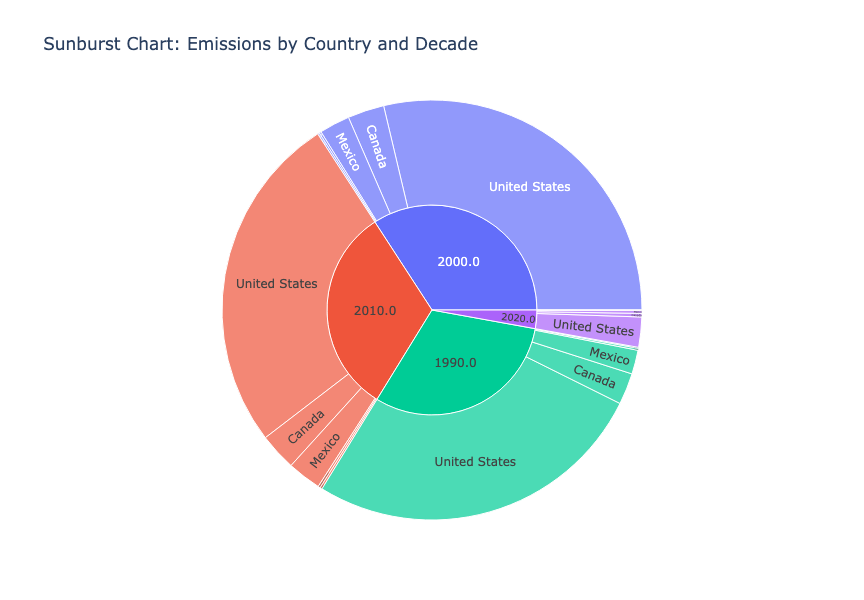

In [46]:
import pandas as pd
import plotly.express as px
Decade_wise_country = pd.DataFrame(rows, columns = headers)
fig = px.sunburst(
    Decade_wise_country,
    path=["Decade", "Country"],
    values="Total Emissions",
    title="Sunburst Chart: Emissions by Country and Decade",
    labels={"Total Emissions": "Total Emissions (Tons)"},
    template="plotly_white"
)
fig.update_layout(
    width=1000,  # Width of the plot in pixels
    height=600   # Height of the plot in pixels
)
fig.show()

### Guiding Question 3

### 3.  How does average life expectancy correlate with CO₂ emissions per capita and GHG emissions per capita across decades?​

The guiding question,`How does average life expectancy correlate with CO₂ emissions per capita and GHG emissions per capita across decades?` is important because it explores the potential impact of environmental factors on human health. Understanding this correlation helps us assess whether higher levels of carbon emissions and greenhouse gases contribute to lower life expectancy, providing valuable insights into how environmental policies and practices might influence public health outcomes. 

By investigating the long-term relationship between emissions and life expectancy, we can better understand the broader implications of climate change, informing strategies for sustainable development, public health, and policy-making that aim to improve quality of life while addressing environmental challenges. This question is crucial for shaping a future where both human well-being and the environment are prioritized together.


- The aim is to explore the relationship between `life expectancy` and `CO₂ emissions per capita` and `GHG emissions per capita` over the decades.

- **Data Preparation**: Merged the life expectancy, CO₂ emissions, and GHG emissions tables into a single table (`life_expectancy_co2_ghg`) for easier analysis.
- **Grouping by Decade**: Grouped the data by decade (e.g., 1990s, 2000s) to analyze changes in life expectancy and emissions over time.
- **Calculating Averages**: Calculated the average life expectancy, CO₂ emissions per capita, and GHG emissions per capita for each decade.
- **Data Analysis**: Ran queries to find the average life expectancy and emissions for each country or continent by decade.

This approach helps in identifying trends between emissions and life expectancy, providing valuable insights for environmental and health-related decisions.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [ ]:
# merging the three tables and transform the data

cursor.execute(f"SHOW TABLES LIKE 'life_expectancy_co2_ghg'")
result = cursor.fetchone()
if result:
    cursor.execute("DROP TABLE life_expectancy_co2_ghg")

merge_query="""
CREATE TABLE life_expectancy_co2_ghg AS
WITH temp_merged_table AS (
    SELECT
        a.Entity AS entity,
        a.Code AS code,
        a.Year AS year,
        a.Code_Year,
        a.Life_Expectancy,
        b.Per_capita_greenhouse_gas_emissions AS GHG_Emissions,
        a.CO2_Emissions,
        CASE WHEN b.Per_capita_greenhouse_gas_emissions != 0 
             THEN a.life_expectancy / b.Per_capita_greenhouse_gas_emissions 
             ELSE 0 
        END AS life_expectancy_ghg_ratio,
        a.continent
    FROM life_expectancy a
    JOIN per_capita_ghg b
        ON a.Code_Year = b.Code_Year
)
SELECT 
    a.entity,
    a.code,
    a.year,
    a.Life_Expectancy,
    a.GHG_Emissions,
    b.Per_capita_co2_emissions,
    a.life_expectancy_ghg_ratio,
    CASE WHEN b.Per_capita_co2_emissions != 0 
             THEN a.Life_Expectancy / b.Per_capita_co2_emissions 
             ELSE 0 
        END AS life_expectancy_co2_ratio,
    a.GHG_Emissions + b.Per_capita_co2_emissions as combined_emissions,
    a.continent
FROM temp_merged_table a
JOIN per_capita_co2 b
    ON a.Code_Year = b.Code_Year;
"""

cursor.execute(merge_query)

verify_query=f"""SELECT * FROM life_expectancy_co2_ghg LIMIT 10"""
cursor.execute(verify_query)
data=cursor.fetchall()

columns = ['entity', 'code', 'year', 'Life_Expectancy', 'GHG_Emissions', 'Per_capita_co2_emissions', 'life_expectancy_ghg_ratio', 'life_expectancy_co2_ratio', 'combined_emissions', 'continent']

for row in data[:2]:
    formatted_row = "\n".join([f"{columns[i]}: {row[i]}" for i in range(len(columns))])
    print(formatted_row)
    print("\n")

Merging the life_expectancy, per_capita_ghg, and per_capita_co2 tables combines relevant data, enabling a unified analysis of life expectancy in relation to GHG and CO₂ emissions. This merge allows for the creation of new metrics like the life expectancy to emissions ratios and a combined emissions column, providing a comprehensive view of the environmental impact on health outcomes.

#### Correlation of life expectancy with co2 emissions per capita by country analysis

In [53]:
from tabulate import tabulate

# SQL query to analyze the correlation between CO2 emissions and life expectancy, excluding rows with zero CO2 emissions
correlation_co2_life_expectancy_query = f"""
    SELECT 
        entity,
        FLOOR(year / 10) * 10 AS decade,
        AVG(Life_Expectancy) AS avg_life_expectancy,
        AVG(Per_capita_co2_emissions) AS avg_co2_emissions
    FROM life_expectancy_co2_ghg
    GROUP BY entity,decade
    HAVING avg_co2_emissions > 0
"""

# Execute the query
cursor.execute(correlation_co2_life_expectancy_query)
data = cursor.fetchall()

# Define column headers
columns = ['Country', 'Decade', 'Avg_Life_Expectancy', 'Avg_CO2_Emissions']

# Organize the data
organized_data = []
for d in data[:20]:
    result = dict(zip(columns, d))
    organized_data.append([result['Country'], result['Decade'], result['Avg_Life_Expectancy'], result['Avg_CO2_Emissions']])

# Print the results
print("Analyzing the correlation between CO2 emissions per capita and life expectancy decade by decade")
print(tabulate(organized_data, headers=columns, tablefmt="grid"))

df5=pd.DataFrame(data, columns=columns)

Analyzing the correlation between CO2 emissions per capita and life expectancy decade by decade
+-------------+----------+-----------------------+---------------------+
| Country     |   Decade |   Avg_Life_Expectancy |   Avg_CO2_Emissions |
+=============+==========+=======================+=====================+
| Afghanistan |     1950 |               30.1622 |           0.0225145 |
+-------------+----------+-----------------------+---------------------+
| Afghanistan |     1960 |               34.8959 |           0.0901349 |
+-------------+----------+-----------------------+---------------------+
| Afghanistan |     1970 |               39.2759 |           0.162547  |
+-------------+----------+-----------------------+---------------------+
| Afghanistan |     1980 |               37.9809 |           0.252313  |
+-------------+----------+-----------------------+---------------------+
| Afghanistan |     1990 |               50.4362 |           0.105613  |
+-------------+----------+--

### Observations

**Trend 1: Diverging Life Expectancy**

High-income regions like Europe and North America saw life expectancy rise from around 65 years in 1950 to over 78 years in 2020, driven by investments in healthcare and public health measures. Meanwhile, countries like Afghanistan and Somalia, starting from much lower averages (30–40 years), saw slower progress due to conflict and limited healthcare access, highlighting the impact of socioeconomic stability on health outcomes.

**Trend 2: High Life Expectancy with Early Emissions Peaks in Developed Countries**

The U.S., Germany, and Japan achieved life expectancy increases (65+ years in 1950 to 78–82 years in 2020) alongside high CO₂ emissions during industrialization. Post-2000, emissions stabilized or declined due to renewable energy adoption and stricter environmental policies, showcasing the potential to balance sustainability with public health improvements.

**Trend 3: Emissions Growth and Health Gains in Emerging Economies**

Emerging economies like China and India saw rapid life expectancy gains (e.g., China from 45 to 76 years between 1950–2020) alongside industrial growth and rising emissions. Economic development and healthcare investments drove progress, though often at an environmental cost.

**Trend 4: Low Emissions Growth in Resource-Limited Nations**

Bangladesh and Vietnam improved life expectancy (40–50 years in 1950 to 72–75 years in 2020) with minimal emissions growth by focusing on low-carbon industries and benefiting from global health interventions. These nations improved living standards while avoiding heavy industrialization.

**Trend 5: Stabilized Emissions in High-Life-Expectancy Nations**

Sweden, Norway, and France maintained high life expectancy (82+ years by 2020) while reducing emissions through renewable energy and environmental policies. Their model illustrates how sustainability and health improvements can align.

### Correlation of life expectancy with ghg emissions by country analysis

The following code analyzes the relationship between GHG emissions and life expectancy across decades for each country. It groups the data by country and decade, calculates the average life expectancy and GHG emissions, and excludes rows where GHG emissions are zero. The results are then displayed in a table format to show the correlation across countries:

In [59]:
from tabulate import tabulate

# SQL query to analyze the correlation between GHG emissions and life expectancy
correlation_ghg_life_expectancy_query = f"""
    SELECT 
        entity,
        FLOOR(year / 10) * 10 AS decade,
        AVG(Life_Expectancy) AS avg_life_expectancy,
        AVG(GHG_Emissions) AS avg_ghg_emissions
    FROM life_expectancy_co2_ghg
    GROUP BY entity,decade
    HAVING avg_ghg_emissions > 0
"""

# Execute the query
cursor.execute(correlation_ghg_life_expectancy_query)
data = cursor.fetchall()

# Define column headers
columns = ['Continent', 'Decade', 'Avg_Life_Expectancy', 'Avg_GHG_Emissions']

# Initialize an empty list to organize the data
organized_data = []
for d in data[:20]:
    result = dict(zip(columns, d))
    organized_data.append([result['Continent'], result['Decade'], result['Avg_Life_Expectancy'], result['Avg_GHG_Emissions']])

# Print the results
print("Analyzing the correlation between GHG emissions per capita and life expectancy decade by decade across countries")
print(tabulate(organized_data, headers=columns, tablefmt="grid"))

df6=pd.DataFrame(data, columns=columns)

Analyzing the correlation between GHG emissions per capita and life expectancy decade by decade across countries
+-------------+----------+-----------------------+---------------------+
| Continent   |   Decade |   Avg_Life_Expectancy |   Avg_GHG_Emissions |
+=============+==========+=======================+=====================+
| Afghanistan |     1950 |               30.1622 |            2.87016  |
+-------------+----------+-----------------------+---------------------+
| Afghanistan |     1960 |               34.8959 |            2.60726  |
+-------------+----------+-----------------------+---------------------+
| Afghanistan |     1970 |               39.2759 |            1.83856  |
+-------------+----------+-----------------------+---------------------+
| Afghanistan |     1980 |               37.9809 |            1.70311  |
+-------------+----------+-----------------------+---------------------+
| Afghanistan |     1990 |               50.4362 |            1.03823  |
+----------

### Observations

**Trend 1: Uneven Life Expectancy Growth Across Countries**  

Developed nations like Japan and Norway boast high life expectancy (over 80 years in 2020) due to investments in healthcare, education, and social welfare. War-torn and underdeveloped nations, such as Afghanistan, struggle with limited healthcare access, poverty, and political instability, barely reaching 65 years. Japan’s preventive healthcare and cultural factors contrast sharply with Afghanistan’s challenges of malnutrition and poor sanitation.  

**Trend 2: GHG Emissions Reflect Economic and Industrial Profiles**  

Large economies like the U.S. and China lead in greenhouse gas emissions (over 7 metric tons per capita), driven by industrialization and fossil fuel dependency. Smaller nations like Bhutan maintain near-zero emissions due to reliance on renewables and limited industrial activity. Transitioning to renewable energy at scale remains a significant challenge for major emitters.  

**Trend 3: Declining GHG Emissions in Developed Nations Post-2000**  

European countries, including Germany and the UK, significantly reduced emissions post-2000 while maintaining high living standards. Key drivers include renewable energy adoption, energy-efficient technologies, and strict environmental regulations like carbon pricing and emissions caps. These efforts highlight how sustainability and economic growth can coexist.  

**Trend 4: Emerging Economies Driving GHG Emissions Growth**  

Emerging markets like India and Brazil show rising emissions alongside life expectancy improvements. Industrialization, urbanization, and reliance on fossil fuels drive emissions, as industries expand and energy demand grows. Transitioning to sustainable practices and cleaner energy sources is vital to balancing development with environmental health.

### Guiding Question 4

### 4.  What are the proportional contributions of each greenhouse gas (e.g., CO, methane, nitrous oxide) to total emissions, and which gas contributes most to overall emissions in the top 10 and bottom 10 countries by life expectancy?​

This guiding question aims to understand the relative impact of different greenhouse gases, such as CO₂, methane, and nitrous oxide, on total emissions and identify the dominant contributor. By focusing on the top 10 and bottom 10 countries by life expectancy, it highlights how emissions patterns differ between high and low life expectancy regions, shedding light on potential links between environmental impact and public health outcomes.

**Step 1:** Identify Top and Bottom 10 Countries by Life Expectancy

**Top 10 Countries:**

A query was executed to calculate the average life expectancy for each country using the AVG function.
The results were sorted in descending order of life expectancy, and the top 10 countries were selected.

**Bottom 10 Countries:**

A similar query was executed, but the results were sorted in ascending order to retrieve the bottom 10 countries with the lowest average life expectancy.

Output: Two lists of countries (top_countries and bottom_countries) were created, representing the top and bottom 10 groups, respectively.

**Step 2:** Identify the Dominant Greenhouse Gas (GHG)

The dominant GHG for each country was identified by determining the gas with the highest contribution ratio from three possible gases:
- CO
- Methane
- Nitrous Oxide

The query utilized the GREATEST function to identify the maximum ratio among the three greenhouse gases for each country. A CASE statement was then used to determine and assign the dominant gas based on the highest ratio. Additionally, the query calculated the maximum GHG ratio for each country, providing insights into the predominant greenhouse gas contributing to emissions.

In [70]:
cursor.execute("""DROP TABLE comp_expectancy""")

In [71]:
def join_emissions_and_expectancy(db_name):
    # SQL query to join the two tables
    join_query = """
    CREATE TABLE comp_expectancy AS
    SELECT 
        ghg.Entity,
        ghg.Code,
        ghg.Year,
        ghg.Annual_NitrousOxide_Emissions_CO2equivalents,
        ghg.Annual_Methane_Emissions_CO2equivalents,
        ghg.Annual_CO2_emissions,
        ghg.Total_Emissions,
        ghg.CO2_Ratio,
        ghg.Methane_Ratio,
        ghg.NitrousOxide_Ratio,
        life.Life_Expectancy,
        life.Continent
    FROM 
        ghg_comp ghg
    INNER JOIN 
        life_expectancy life
    ON 
        ghg.code_year = life.code_year;
    """
    
    cursor.execute(join_query)
    results = cursor.fetchall()

    # Print the results
    for row in results:
        print(row)

# Call the function
join_emissions_and_expectancy("student")

Top 10 Countries by Life Expectancy - Highest Greenhouse Gas Contributor:
+---------------+-----------------+-------------------------+--------+
|    Country    | Life Expectancy | Highest GHG Contributor | Ratio  |
+---------------+-----------------+-------------------------+--------+
|    Andorra    |      77.91      |         Methane         | 0.4947 |
|   Australia   |      76.05      |           CO2           | 0.532  |
|    Canada     |      76.09      |           CO2           | 0.8511 |
|    Iceland    |      77.32      |           CO2           | 0.7797 |
|     Japan     |      76.32      |           CO2           | 0.7496 |
| Liechtenstein |      76.19      |         Methane         | 1.0259 |
|  Netherlands  |      76.66      |           CO2           | 0.7075 |
|    Norway     |      77.0       |           CO2           | 0.6033 |
|    Sweden     |      77.25      |           CO2           | 0.7579 |
|  Switzerland  |      76.83      |           CO2           | 0.6094 |
+--

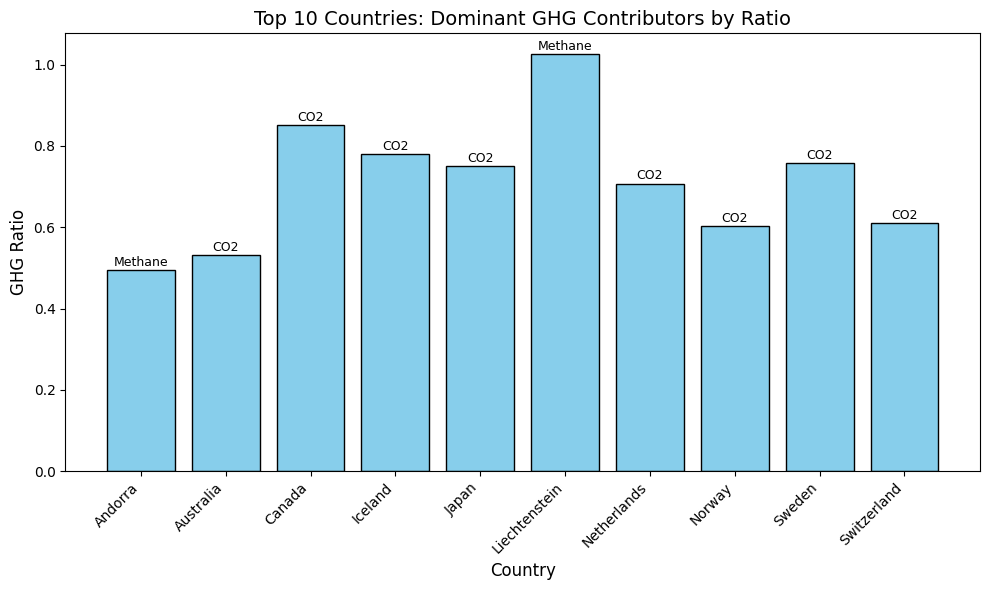

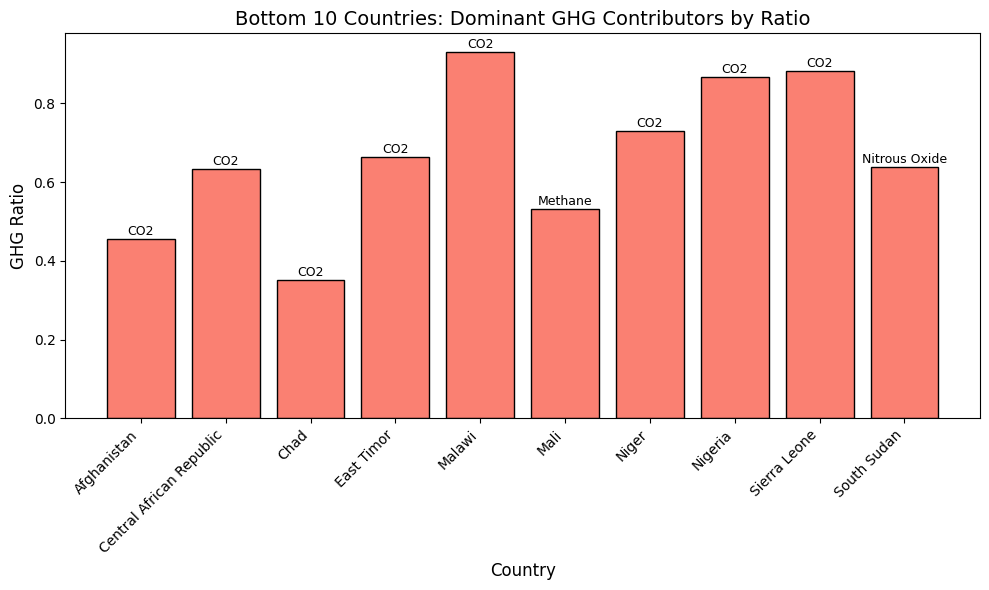

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate  # Import the tabulate library

def identify_gas_contributors_with_separate_graphs(db_name, table_name):
    # Query to get the top 10 countries by average life expectancy
    top_query = f"""
        SELECT Entity, ROUND(AVG(Life_Expectancy), 2) AS average_life_expectancy
        FROM {table_name}
        GROUP BY Entity
        ORDER BY average_life_expectancy DESC
        LIMIT 10;
    """
    cursor.execute(top_query)
    top_results = cursor.fetchall()
    top_countries = [row[0] for row in top_results]

    # Query to get the bottom 10 countries by average life expectancy
    bottom_query = f"""
        SELECT Entity, ROUND(AVG(Life_Expectancy), 2) AS average_life_expectancy
        FROM {table_name}
        GROUP BY Entity
        ORDER BY average_life_expectancy ASC
        LIMIT 10;
    """
    cursor.execute(bottom_query)
    bottom_results = cursor.fetchall()
    bottom_countries = [row[0] for row in bottom_results]

    # Query to find the gas with the highest ratio for each country
    gas_query = f"""
        SELECT Entity, 
               ROUND(AVG(Life_Expectancy), 2) AS average_life_expectancy,
               CASE 
                   WHEN CO2_Ratio = GREATEST(COALESCE(CO2_Ratio, 0), COALESCE(Methane_Ratio, 0), COALESCE(NitrousOxide_Ratio, 0)) THEN 'CO2'
                   WHEN Methane_Ratio = GREATEST(COALESCE(CO2_Ratio, 0), COALESCE(Methane_Ratio, 0), COALESCE(NitrousOxide_Ratio, 0)) THEN 'Methane'
                   WHEN NitrousOxide_Ratio = GREATEST(COALESCE(CO2_Ratio, 0), COALESCE(Methane_Ratio, 0), COALESCE(NitrousOxide_Ratio, 0)) THEN 'Nitrous Oxide'
               END AS Gas,
               GREATEST(COALESCE(CO2_Ratio, 0), COALESCE(Methane_Ratio, 0), COALESCE(NitrousOxide_Ratio, 0)) AS Max_Ratio
        FROM {table_name}
        WHERE Entity IN ({', '.join(['%s'] * (len(top_countries) + len(bottom_countries)))})
        GROUP BY Entity
    """
    cursor.execute(gas_query, top_countries + bottom_countries)
    gas_results = cursor.fetchall()

    # Process results to identify the highest gas contributor for each group
    top_gas_contributors = []
    bottom_gas_contributors = []

    for row in gas_results:
        country = row[0]
        life_expectancy = row[1]
        gas = row[2]
        max_ratio = row[3]

        if country in top_countries:
            top_gas_contributors.append((country, life_expectancy, gas, max_ratio))
        elif country in bottom_countries:
            bottom_gas_contributors.append((country, life_expectancy, gas, max_ratio))

    # Print results in table format
    print("Top 10 Countries by Life Expectancy - Highest Greenhouse Gas Contributor:")
    print(tabulate(top_gas_contributors, headers=["Country", "Life Expectancy", "Highest GHG Contributor", "Ratio"], tablefmt="pretty"))
    print()

    print("Bottom 10 Countries by Life Expectancy - Highest Greenhouse Gas Contributor:")
    print(tabulate(bottom_gas_contributors, headers=["Country", "Life Expectancy", "Highest GHG Contributor", "Ratio"], tablefmt="pretty"))
    print()

    # Visualization for Top 10 Countries
    top_countries = [row[0] for row in top_gas_contributors]
    top_ratios = [row[3] for row in top_gas_contributors]
    top_gases = [row[2] for row in top_gas_contributors]

    plt.figure(figsize=(10, 6))
    plt.bar(top_countries, top_ratios, color='skyblue', edgecolor='black')
    for i, gas in enumerate(top_gases):
        plt.text(i, top_ratios[i] + 0.01, gas, ha='center', fontsize=9, color='black')
    plt.title('Top 10 Countries: Dominant GHG Contributors by Ratio', fontsize=14)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('GHG Ratio', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Visualization for Bottom 10 Countries
    bottom_countries = [row[0] for row in bottom_gas_contributors]
    bottom_ratios = [row[3] for row in bottom_gas_contributors]
    bottom_gases = [row[2] for row in bottom_gas_contributors]

    plt.figure(figsize=(10, 6))
    plt.bar(bottom_countries, bottom_ratios, color='salmon', edgecolor='black')
    for i, gas in enumerate(bottom_gases):
        plt.text(i, bottom_ratios[i] + 0.01, gas, ha='center', fontsize=9, color='black')
    plt.title('Bottom 10 Countries: Dominant GHG Contributors by Ratio', fontsize=14)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('GHG Ratio', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Call the function
identify_gas_contributors_with_separate_graphs("student", "comp_expectancy")

### Observations:

**Top 10 Countries:**

These countries have well-regulated industrial and energy sectors contributing to CO2 emissions. Methane's prominence in some countries may be due to localized agricultural or waste management practices.

**Bottom 10 Countries:**

These countries tend to show dominance in CO2 emissions despite lower industrialization levels, suggesting a significant impact of energy-related activities. However, Methane and Nitrous Oxide also play key roles due to agricultural dependencies.


**Graph 1:** Top 10 Countries by Life Expectancy - Dominant GHG Contributors

Key Observations:

CO2 Dominance in Developed Countries:
- Most of the countries (e.g., Canada, Iceland, Sweden) have CO2 as the dominant contributor, which is associated with industrial and energy production activities.
- Methane Dominance in Specific Countries: Methane is the dominant gas in Andorra and Liechtenstein, likely due to agriculture or landfill emissions.
- The ratios are generally above 0.4, showcasing consistent GHG emission contributions despite higher life expectancy and potentially stricter environmental regulations.

**Graph 2:** Bottom 10 Countries by Life Expectancy - Dominant GHG Contributors

Key Observations:

- Dominance of CO2: CO2 is the dominant contributor for most countries, indicating heavy reliance on fossil fuel-related activities even in countries with lower life expectancy.
- Methane is the dominant contributor in Mali, possibly due to agriculture or livestock-related emissions.
- Nitrous Oxide is the dominant contributor in South Sudan, potentially linked to specific agricultural practices.
- The GHG ratios range between 0.5 and 0.9, showing significant proportions of emissions even in the bottom 10 life expectancy group.

### Guiding Question 5

### What are the patterns of CO₂ and GHG emissions from the energy production in North America? How have these emissions evolved over time? What impact do they have on life expectancy?​

For the final guiding question we look at the growth rates for greenhouse gas (GHG) emissions and CO₂ emissions for energy production in North America showing their fluctuations, links to global events, and relation to life expectancy trends in the continent.

To answer this question, we perform the following steps in SQL:

For the first table:

1. Filtered data for North American countries (Mexico, Canada and USA) and joined datasets for GHG and CO₂ emissions.
2. Created column for CO₂ emissions from energy production by combining data from different sources of energy.
3. Aggregated data Year on Year and Computed growth rate of emissions across years using LAG function.
4. Join life expectancy data by taking average of life expectancy across countries in North America

For the second table:
1. Aggregated GHG emission decade  wise for countries in North America.
2. Join to table with Aggregated CO₂ emission decade-wise for countries in North America.

+--------+--------------+-------------------+--------------------------+-------------------+-------------------+
|   Year |   GHG_Energy |   CO2_from_Energy |   GHG_Energy_Growth_Rate |   CO2_Growth_Rate |   Life_Expectancy |
+========+==============+===================+==========================+===================+===================+
|   1990 |   3.377e+08  |       5.75863e+09 |                          |                   |           73.947  |
+--------+--------------+-------------------+--------------------------+-------------------+-------------------+
|   1991 |   3.3983e+08 |       5.70783e+09 |                     0.63 |             -0.88 |           74.162  |
+--------+--------------+-------------------+--------------------------+-------------------+-------------------+
|   1992 |   3.4143e+08 |       5.83423e+09 |                     0.47 |              2.21 |           74.4317 |
+--------+--------------+-------------------+--------------------------+-------------------+----

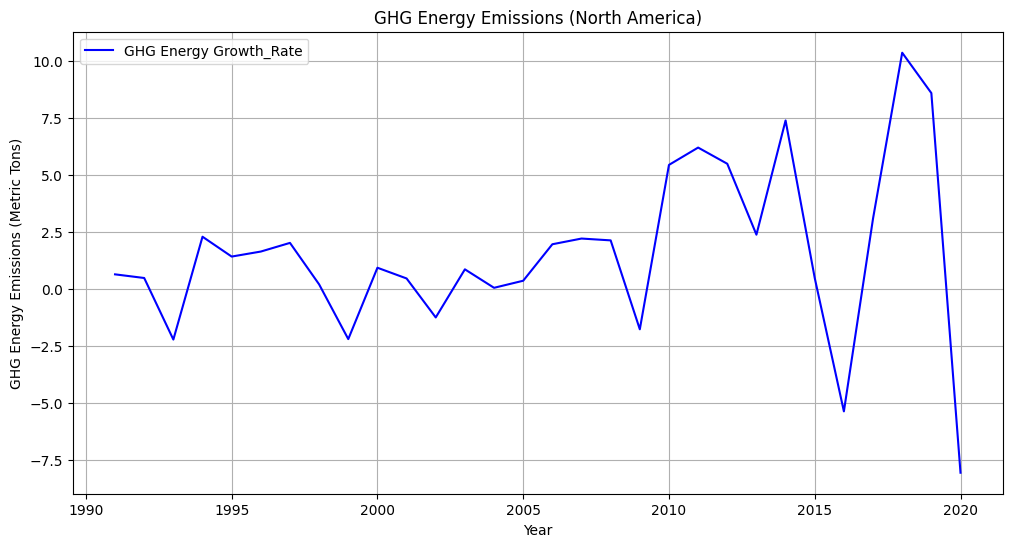

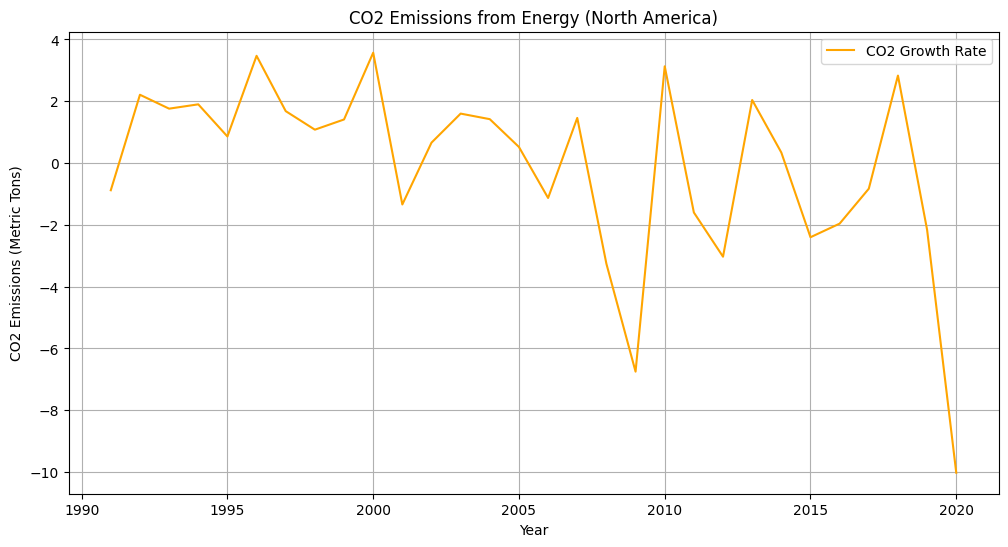

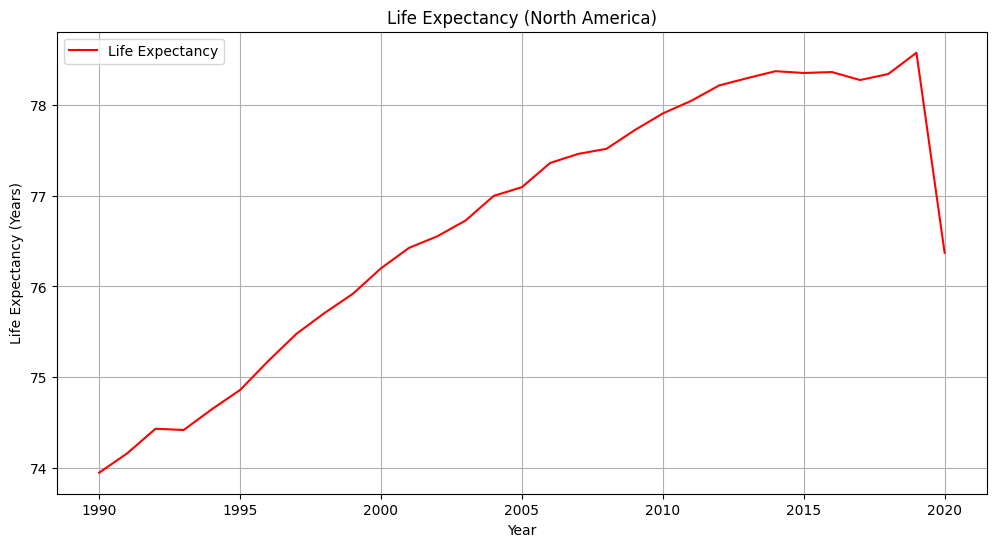

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

def Q5_with_life_expectancy(db_name, table1, table2, life_expectancy_table):
    query = f"""

            WITH NorthAmerica AS (
                SELECT t1.Year, t1.Fugitive_emissions_of_greenhouse_gases_from_energy_production,
                    t2.CO2_emissions_from_gas, t2.CO2_emissions_from_oil, t2.CO2_emissions_from_coal
                FROM {table1} t1
                INNER JOIN {table2} t2
                ON t1.code_year = t2.code_year
                WHERE t1.Code IN ('USA', 'MEX', 'CAN')),
            GroupedData AS (
                SELECT Year, SUM(Fugitive_emissions_of_greenhouse_gases_from_energy_production) AS GHG_Energy_Emission,
                    SUM(CO2_emissions_from_gas) AS CO2_from_gas, SUM(CO2_emissions_from_oil) AS CO2_from_oil,
                    SUM(CO2_emissions_from_coal) AS CO2_from_coal
                FROM NorthAmerica
                GROUP BY Year),
            FinalEmissionsData AS (
                SELECT Year, GHG_Energy_Emission, CO2_from_gas, CO2_from_oil, CO2_from_coal,
                    (CO2_from_gas + CO2_from_oil + CO2_from_coal) AS CO2_emissions_from_energy_production,
                    LAG(GHG_Energy_Emission) OVER (ORDER BY Year) AS Previous_GHG_Energy_Emission,
                    LAG((CO2_from_gas + CO2_from_oil + CO2_from_coal)) OVER (ORDER BY Year) AS Previous_CO2_Emissions
                FROM GroupedData),

            LifeExpectancyNorthAmerica AS (
                SELECT Year,AVG(Life_Expectancy) AS Life_Expectancy
                FROM {life_expectancy_table}
                WHERE Code IN ('USA', 'MEX', 'CAN')
                GROUP BY Year)
            
            SELECT fe.Year,fe.GHG_Energy_Emission,fe.CO2_emissions_from_energy_production,
                ROUND((fe.GHG_Energy_Emission - fe.Previous_GHG_Energy_Emission) / fe.Previous_GHG_Energy_Emission * 100, 2) AS GHG_Energy_Emission_Growth_Rate,
                ROUND((fe.CO2_emissions_from_energy_production - fe.Previous_CO2_Emissions) / fe.Previous_CO2_Emissions * 100, 2) AS CO2_Emissions_Growth_Rate,
                le.Life_Expectancy
            FROM FinalEmissionsData fe
            INNER JOIN LifeExpectancyNorthAmerica le
            ON fe.Year = le.Year;
            """
            
    cursor.execute(query)
    results = cursor.fetchall()
       
    columns = ['Year', 'GHG_Energy', 'CO2_from_Energy', 'GHG_Energy_Growth_Rate', 'CO2_Growth_Rate', 'Life_Expectancy']
    print(tabulate(results, headers=columns, tablefmt="grid"))

    #Plotting data for CO2, GHG emmsions and life expectancy separately
    q5 = pd.DataFrame(results, columns=columns)
    
    # GHG Emissions
    plt.figure(figsize=(12, 6))
    plt.plot(q5['Year'], q5['GHG_Energy_Growth_Rate'], label='GHG Energy Growth_Rate',color='blue')
    plt.xlabel('Year')
    plt.ylabel('GHG Energy Emissions (Metric Tons)')
    plt.title('GHG Energy Emissions (North America)')
    plt.legend()
    plt.grid()
    plt.show()
    
    # CO2 Emissions
    plt.figure(figsize=(12, 6))
    plt.plot(q5['Year'], q5['CO2_Growth_Rate'], label='CO2 Growth Rate',color='orange')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (Metric Tons)')
    plt.title('CO2 Emissions from Energy (North America)')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Life Expectancy
    plt.figure(figsize=(12, 6))
    plt.plot(q5['Year'], q5['Life_Expectancy'], label='Life Expectancy',color='red')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy (Years)')
    plt.title('Life Expectancy (North America)')
    plt.legend()
    plt.grid()
    plt.show()


Q5_with_life_expectancy("student", "ghg_sector", "co2_emissions", "life_expectancy")

In [76]:
def Q6(db_name, table1, table2):
    query = f"""
            WITH NorthAm AS (
                SELECT t1.Year, FLOOR(t1.Year / 10) * 10 AS Decade, t1.Fugitive_emissions_of_greenhouse_gases_from_energy_production,
                    t2.CO2_emissions_from_gas, t2.CO2_emissions_from_oil, t2.CO2_emissions_from_coal
                FROM {table1} t1
                INNER JOIN {table2} t2
                ON t1.code_year = t2.code_year
                WHERE t1.Code IN ('USA', 'MEX', 'CAN')),
            Decade_data AS (
                SELECT Decade, SUM(Fugitive_emissions_of_greenhouse_gases_from_energy_production) AS GHG_Energy_Emission,
                SUM(CO2_emissions_from_gas) AS CO2_from_gas,SUM(CO2_emissions_from_oil) AS CO2_from_oil, SUM(CO2_emissions_from_coal) AS CO2_from_coal
                FROM NorthAm
                GROUP BY Decade
            )
            SELECT 
                Decade,
                GHG_Energy_Emission,
                (CO2_from_gas + CO2_from_oil + CO2_from_coal) AS CO2_emissions_from_energy_production
            FROM Decade_data
            WHERE Decade < 2020
            ORDER BY DECADE;
            """
            
    cursor.execute(query)
    results = cursor.fetchall()
    columns = [ 'Decade', 'GHG Emissions from energy production', 'CO2 emissions from_energy production']
    print(tabulate(results, headers=columns, tablefmt="grid"))

    q5b = pd.DataFrame(results, columns=columns)
            
Q6("student", "ghg_sector", "co2_emissions")

+----------+----------------------------------------+----------------------------------------+
|   Decade |   GHG Emissions from energy production |   CO2 emissions from_energy production |
+==========+========================================+========================================+
|     1990 |                            3.46287e+09 |                            6.11887e+10 |
+----------+----------------------------------------+----------------------------------------+
|     2000 |                            3.61709e+09 |                            6.82733e+10 |
+----------+----------------------------------------+----------------------------------------+
|     2010 |                            4.69412e+09 |                            6.27406e+10 |
+----------+----------------------------------------+----------------------------------------+


### Observations

**Year-on-Year Life Expectancy, Greenhouse Gas, and CO₂ Emissions:**

GHG and CO₂ emissions show fluctuations, with notable dips like -2.23% in 1995 and peaks such as 6.19% in 2012. From the early 2000s to 2014, emissions generally increased due to higher energy demands. CO₂ emissions fluctuated, with significant declines in 2009 (-6.75%) due to the recession and recovery in 2010 (5.43%). Since 2015, CO₂ emissions have declined as cleaner energy sources were adopted.

**Highest Growth and Lowest Dips:**

The highest GHG growth occurred in 2018 (10.35%) during economic expansion, while CO₂ emissions peaked in 2010 (5.43%) post-recession. The sharpest GHG decline was in 2020 (-8.07%) due to COVID-19, and the lowest CO₂ growth was in 2009 (-6.75%) during the financial crisis.

**Relation to Events:**

Emission fluctuations align with global events, such as the 2009 recession and 2020 pandemic restrictions. The periods of 2010 and 2018 highlight the environmental costs of rapid recovery without clean energy transitions.

**Possible Correlation to Life Expectancy:**

There’s no direct correlation between emissions and life expectancy in this dataset. Life expectancy improvements are more tied to healthcare and socioeconomic factors, though long-term emissions may indirectly affect life expectancy through climate change and pollution.

**Decade-wise Greenhouse Gas and CO₂ Emissions:**

The 1990s saw lower emissions due to environmental initiatives, while the 2000s experienced higher emissions from economic growth. In the 2010s, emissions declined as cleaner energy sources gained traction, driven by policies like the Paris Agreement.

## Feedback

**1. For guiding questions 4, it would be helpful to understand the results through visuals so I'm glad this will be included in the final report.**

We have included the visualizations for guiding question 4 in the above section. These visuals effectively highlight the proportional contributions of each greenhouse gas (e.g., CO₂, methane, nitrous oxide) to total emissions and identify the dominant gas for the top 10 and bottom 10 countries by life expectancy. This enhances the interpretability of the findings and provides a clearer understanding of the data trends.

**2. I think it will be nice to also have a sense of whether the patterns you’ve noticed in different countries are part of a larger continental pattern.**

**For Guiding Question 2**

In [89]:
cursor.execute("""
    DROP TABLE IF EXISTS Continent_Data;
""")
cursor.execute("""
    DROP TABLE IF EXISTS Top5_Countries_Per_Continent;
""")
cursor.execute("""
    DROP TABLE IF EXISTS Decade_Emissions;
""")
cursor.execute("""
    DROP TABLE IF EXISTS Continent_Emissions;
""")
connection.commit()

In [90]:
# Step 1: Filter rows with Continent (for all continents)
query1 = f"""
CREATE TEMPORARY TABLE Continent_Data AS
SELECT *
FROM Final_Dataset;
"""
cursor.execute(query1)

# Step 2: Add a column for Total Emissions
query2 = f"""
ALTER TABLE Continent_Data ADD COLUMN Total_Emissions FLOAT;
"""
cursor.execute(query2)

# Calculate Total Emissions
query3 = f"""
UPDATE Continent_Data
SET Total_Emissions = 
    CO2_emissions_from_other_industry + 
    CO2_emissions_from_flaring + 
    CO2_emissions_from_cement + 
    CO2_emissions_from_gas + 
    CO2_emissions_from_oil + 
    CO2_emissions_from_coal + 
    Greenhouse_gas_emissions_from_agriculture +
    Greenhouse_gas_emissions_from_waste +
    Greenhouse_gas_emissions_from_buildings +
    Greenhouse_gas_emissions_from_industry +
    Greenhouse_gas_emissions_from_manufacturing_and_construction +
    Greenhouse_gas_emissions_from_transport +
    Greenhouse_gas_emissions_from_electricity_and_heat +
    Fugitive_emissions_of_greenhouse_gases_from_energy_production +
    Greenhouse_gas_emissions_from_other_fuel_combustion +
    Greenhouse_gas_emissions_from_bunker_fuels;
"""
cursor.execute(query3)

# Step 3: Create decade-wise total emissions for each continent
query5 = """
CREATE TEMPORARY TABLE Decade_Emissions AS
SELECT 
    FLOOR(Year / 10) * 10 AS Decade, 
    Continent, 
    SUM(Total_Emissions) AS Decade_Total_Emissions
FROM Continent_Data
GROUP BY Decade, Continent
ORDER BY Decade, Decade_Total_Emissions DESC;
"""
cursor.execute(query5)
rows=cursor.fetchall()


In [92]:
from tabulate import tabulate
import pandas as pd
# Fetch the results from the database
cursor.execute("SELECT * FROM Decade_Emissions ORDER BY Decade,Decade_Total_Emissions DESC")
rows = cursor.fetchall()
Decade_wise_data = pd.DataFrame(rows,columns = ["Decade", "Continent", "Total Emissions"])

# Define column headers
headers = ["Decade", "Continent", "Total Emissions"]

# Print the results in a tabulated format
print("\nStep 4 Output: Decade-Wise Total Emissions for Each Continent")
print(tabulate(rows, headers=headers, tablefmt="grid"))


Step 4 Output: Decade-Wise Total Emissions for Each Continent
+----------+---------------+-------------------+
|   Decade | Continent     |   Total Emissions |
+==========+===============+===================+
|     1990 | Asia          |       1.39574e+13 |
+----------+---------------+-------------------+
|     1990 | Europe        |       1.13299e+13 |
+----------+---------------+-------------------+
|     1990 | North America |       1.03227e+13 |
+----------+---------------+-------------------+
|     1990 | Africa        |       1.97448e+12 |
+----------+---------------+-------------------+
|     1990 | South America |       1.76375e+12 |
+----------+---------------+-------------------+
|     1990 | Oceania       |       7.01706e+11 |
+----------+---------------+-------------------+
|     2000 | Asia          |       2.07008e+13 |
+----------+---------------+-------------------+
|     2000 | North America |       1.14345e+13 |
+----------+---------------+-------------------+
|     

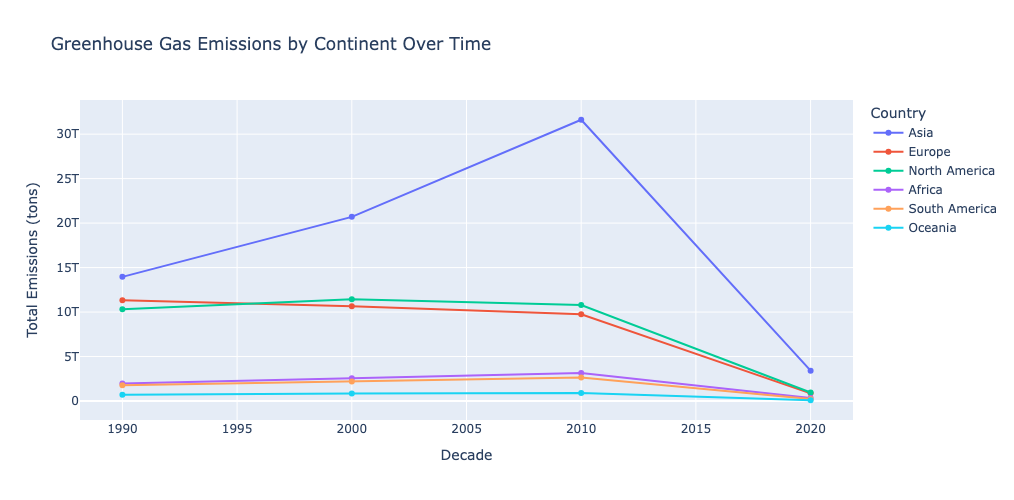

In [93]:
import plotly.express as px
fig = px.line(Decade_wise_data, x="Decade", y="Total Emissions", color="Continent", markers=True, 
              title="Greenhouse Gas Emissions by Continent Over Time",
              labels={"Total Emissions": "Total Emissions (tons)", "Decade": "Decade", "Continent": "Country"})
fig.update_layout(height=500)
# Show the plot
fig.show()

### Analysis of Total Emissions by Continent and Decade

The total greenhouse gas emissions across continents show distinct patterns of industrial growth and energy transitions from the 1990s to the 2020s.

In the 1990s, Asia led emissions with approximately 1.396 × 10¹³, followed by Europe (1.133 × 10¹³) and North America (1.032 × 10¹³). Africa and South America had much lower emissions (~1.974 × 10¹² and 1.764 × 10¹², respectively), reflecting limited industrial activity. Oceania had the smallest emissions at 7.017 × 10¹¹.

The 2000s saw a nearly 50% rise in Asia's emissions to 2.070 × 10¹³, driven by rapid industrialization in countries like China and India. North America remained steady at 1.143 × 10¹³, while Europe slightly declined to 1.064 × 10¹³. Emissions in Africa (2.544 × 10¹²) and South America (2.191 × 10¹²) increased moderately, while Oceania emissions rose marginally to 8.443 × 10¹¹.

In the 2010s, Asia saw another sharp increase to 3.162 × 10¹³ due to ongoing urbanization and industrialization. Meanwhile, North America (1.078 × 10¹³) and Europe (9.742 × 10¹²) experienced slight declines, reflecting cleaner energy adoption and improved policies. Africa (3.159 × 10¹²) and South America (2.654 × 10¹²) showed steady growth, while Oceania remained relatively stable at 8.927 × 10¹¹.

The 2020s marked a shift, with Asia emissions peaking at 3.412 × 10¹² but showing a decline likely influenced by COVID-19's economic impact. North America (9.607 × 10¹¹) and Europe (8.613 × 10¹¹) saw further reductions, driven by renewable energy adoption and efficiency measures. Africa (3.270 × 10¹¹) and South America (2.375 × 10¹¹) exhibited smaller decreases, while Oceania remained the lowest emitter at 8.385 × 10¹⁰.

Overall, Asia consistently led emissions due to rapid industrial growth, while North America and Europe demonstrated steady declines in recent decades. Africa and South America exhibited gradual increases linked to economic development, and Oceania consistently had the lowest emissions due to its smaller industrial base. This trend underscores the varied impact of industrialization and energy transitions on global emissions.

**For Guiding Question 3**

**Correlation of life expectancy with co2 emissions per capita by continent analysis**

In [94]:
from tabulate import tabulate
import pandas as pd

# SQL query to analyze the correlation between CO2 emissions and life expectancy across continents, excluding zero CO2 emissions
correlation_co2_life_expectancy_query = f"""
    SELECT 
        continent,
        FLOOR(year / 10) * 10 AS decade,
        AVG(Life_Expectancy) AS avg_life_expectancy,
        AVG(Per_capita_co2_emissions) AS avg_co2_emissions
    FROM life_expectancy_co2_ghg
    GROUP BY continent,decade
    HAVING avg_co2_emissions > 0
"""

# Execute the query
cursor.execute(correlation_co2_life_expectancy_query)
data = cursor.fetchall()

# Define column headers
columns = ['Continent', 'Decade', 'Avg_Life_Expectancy', 'Avg_CO2_Emissions']

# Organize the data
organized_data = []
for d in data:
    result = dict(zip(columns, d))
    organized_data.append([result['Continent'], result['Decade'], result['Avg_Life_Expectancy'], result['Avg_CO2_Emissions']])

# Print the results
print("Analyzing the correlation between CO2 emissions per capita and life expectancy decade by decade for continents")
print(tabulate(organized_data, headers=columns, tablefmt="grid"))

df1=pd.DataFrame(data, columns=columns)


Analyzing the correlation between CO2 emissions per capita and life expectancy decade by decade for continents
+---------------+----------+-----------------------+---------------------+
| Continent     |   Decade |   Avg_Life_Expectancy |   Avg_CO2_Emissions |
+===============+==========+=======================+=====================+
| Africa        |     1950 |               40.1166 |            0.292797 |
+---------------+----------+-----------------------+---------------------+
| Africa        |     1960 |               44.092  |            0.468564 |
+---------------+----------+-----------------------+---------------------+
| Africa        |     1970 |               48.3752 |            0.835518 |
+---------------+----------+-----------------------+---------------------+
| Africa        |     1980 |               52.2682 |            0.92528  |
+---------------+----------+-----------------------+---------------------+
| Africa        |     1990 |               53.6377 |            

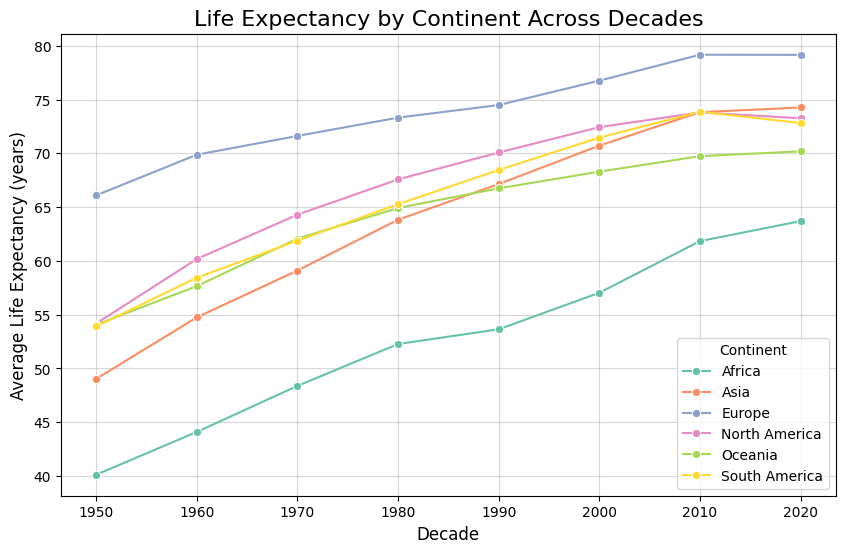

In [95]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='Decade', y='Avg_Life_Expectancy', hue='Continent', marker='o', palette='Set2')


plt.title('Life Expectancy by Continent Across Decades', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Life Expectancy (years)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Continent', fontsize=10)
plt.grid(alpha=0.5)


plt.show()

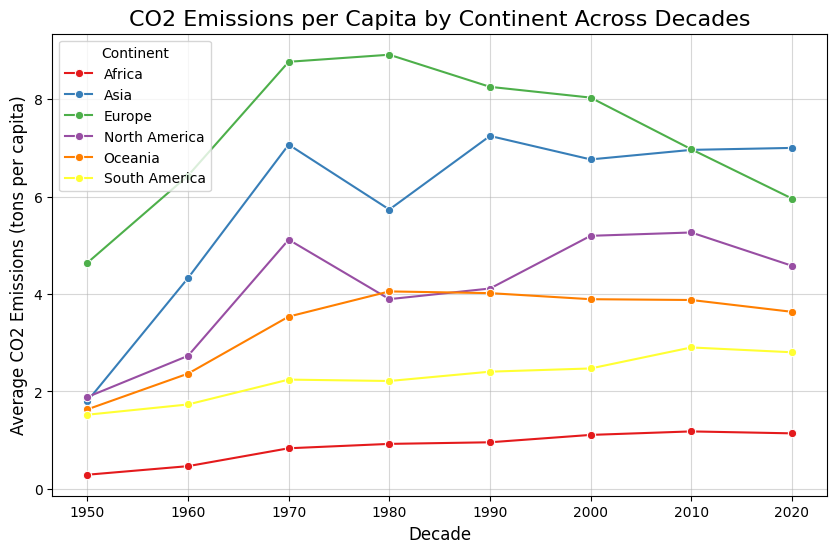

In [96]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='Decade', y='Avg_CO2_Emissions', hue='Continent', marker='o', palette='Set1')

plt.title('CO2 Emissions per Capita by Continent Across Decades', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average CO2 Emissions (tons per capita)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Continent', fontsize=10)
plt.grid(alpha=0.5)

plt.show()

### Observations

**Trend 1: Life Expectancy and Development**

Europe consistently leads in life expectancy, rising from 66 years in 1950 to over 79 years in 2020, while Africa, despite improving from 40 to 64 years, remains the lowest. This disparity is driven by Europe's advanced healthcare, sanitation, nutrition, and education systems, particularly for women, which reduce infant mortality and improve health outcomes. Strong social safety nets, including pensions and universal healthcare, also play a crucial role. In contrast, Africa faces challenges like post-colonial struggles, resource mismanagement, and diseases such as HIV/AIDS, limiting its progress.

**Trend 2: CO₂ Emissions and Industrialization**

Asia's CO₂ emissions surged with industrialization, peaking at 7.06 metric tons per capita in the 1970s, driven by energy demands and coal-based power. Europe and North America initially had high emissions but stabilized post-2000 due to stricter regulations like the U.S. Clean Air Act and the EU Emissions Trading System, shifts to cleaner energy sources, and transitions to service-based economies. Energy efficiency standards and global agreements like the Kyoto Protocol further supported emission reductions, allowing developed regions to decouple emissions growth from economic development.

**Trend 3: Decoupling of Life Expectancy and CO₂ Emissions**

In North America, life expectancy rose from 54 years in 1950 to 73 years in 2020, while emissions followed a U-shaped trend, peaking around 2000 before declining. This decoupling was enabled by renewable energy adoption, increased climate awareness, advancements in energy efficiency, and shifts toward service-based economies. Stricter environmental regulations and innovations like carbon capture technologies further aligned sustainability efforts with economic growth and improved public health.

**Trend 4: Regional Disparities**

Oceania lags behind other developed regions in life expectancy and CO₂ emissions reductions. Limited diversification into technology sectors, reliance on resource extraction, and heavy use of coal hinder environmental progress. Minimal healthcare investments and geographic isolation slow life expectancy improvements. A lack of policy focus on renewable energy and infrastructural challenges also contribute to Oceania’s slower development compared to Europe and North America.

**Correlation of life expectancy with ghg emissions per capita by continent analysis**

In [97]:
from tabulate import tabulate

# SQL query to analyze the correlation between GHG emissions and life expectancy grouped by continent
correlation_ghg_life_expectancy_query = f"""
    SELECT 
        continent,
        FLOOR(year / 10) * 10 AS decade,
        AVG(Life_Expectancy) AS avg_life_expectancy,
        AVG(GHG_Emissions) AS avg_ghg_emissions
    FROM life_expectancy_co2_ghg
    GROUP BY continent, decade
    HAVING avg_ghg_emissions > 0
"""

# Execute the query
cursor.execute(correlation_ghg_life_expectancy_query)
data = cursor.fetchall()

# Define column headers
columns = ['Continent', 'Decade', 'Avg_Life_Expectancy', 'Avg_GHG_Emissions']

# Initialize an empty list to organize the data
organized_data = []
for d in data:
    result = dict(zip(columns, d))
    organized_data.append([result['Continent'], result['Decade'], result['Avg_Life_Expectancy'], result['Avg_GHG_Emissions']])

# Print the results
print("Analyzing the correlation between GHG emissions per capita and life expectancy decade by decade across continents")
print(tabulate(organized_data, headers=columns, tablefmt="grid"))

df2=pd.DataFrame(data, columns=columns)

Analyzing the correlation between GHG emissions per capita and life expectancy decade by decade across continents
+---------------+----------+-----------------------+---------------------+
| Continent     |   Decade |   Avg_Life_Expectancy |   Avg_GHG_Emissions |
+===============+==========+=======================+=====================+
| Africa        |     1950 |               40.1166 |            10.2373  |
+---------------+----------+-----------------------+---------------------+
| Africa        |     1960 |               44.092  |             6.85481 |
+---------------+----------+-----------------------+---------------------+
| Africa        |     1970 |               48.3752 |             6.10728 |
+---------------+----------+-----------------------+---------------------+
| Africa        |     1980 |               52.2682 |             4.82069 |
+---------------+----------+-----------------------+---------------------+
| Africa        |     1990 |               53.6377 |         

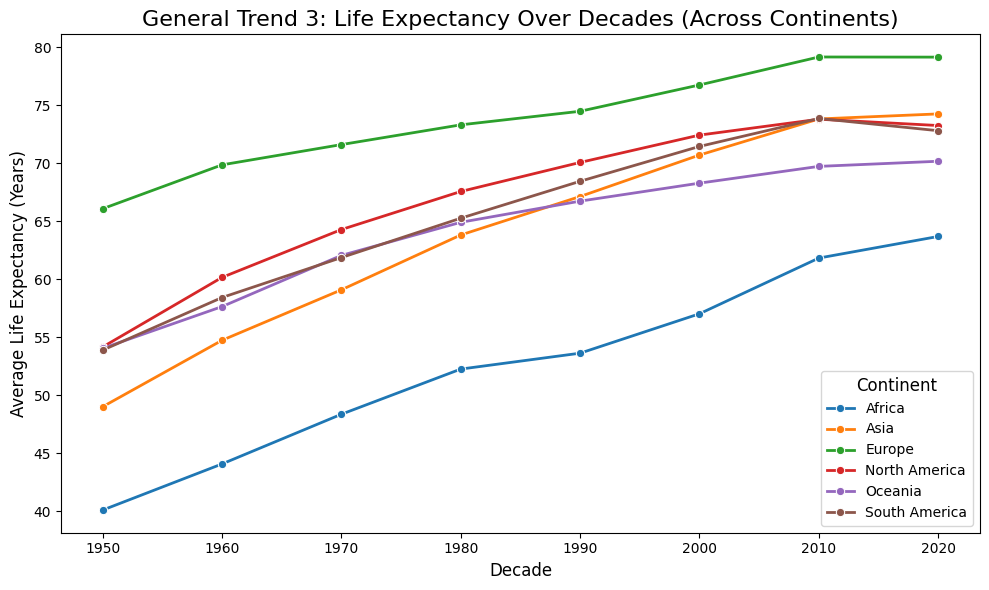

In [98]:
# Life Expectancy Over Decades (Separated by Continent)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df2, x='Decade', y='Avg_Life_Expectancy', hue='Continent', marker='o', palette='tab10', lw=2)
plt.title('General Trend 3: Life Expectancy Over Decades (Across Continents)', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Life Expectancy (Years)', fontsize=12)
plt.legend(title='Continent', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

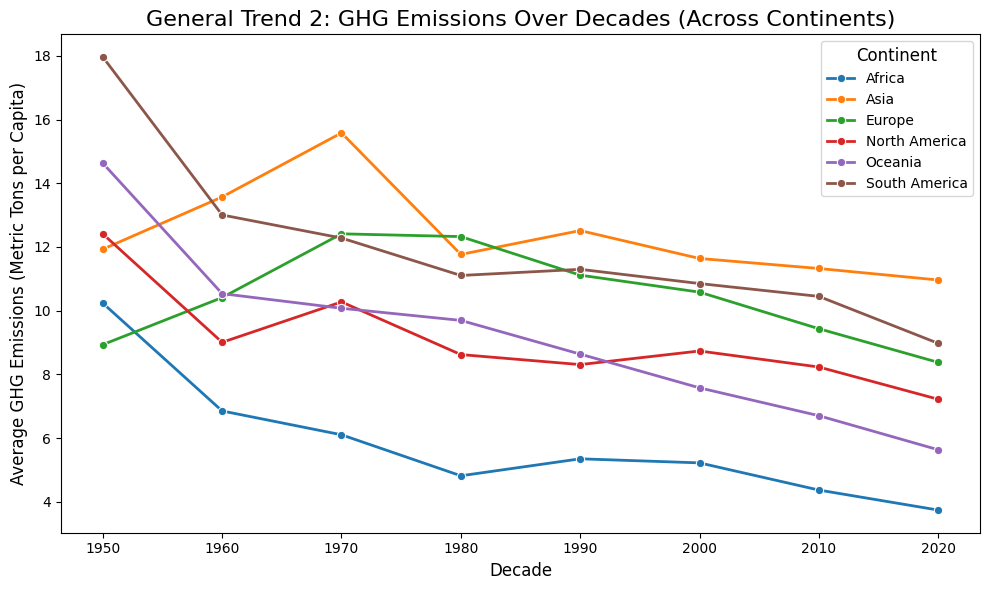

In [99]:
# GHG Emissions Over Decades (Separated by Continent)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df2, x='Decade', y='Avg_GHG_Emissions', hue='Continent', marker='o', palette='tab10', lw=2)
plt.title('General Trend 2: GHG Emissions Over Decades (Across Continents)', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average GHG Emissions (Metric Tons per Capita)', fontsize=12)
plt.legend(title='Continent', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

### Observations

**Trend 1: GHG Emissions in Africa vs. Life Expectancy**  

Africa's GHG emissions decreased from 10.2 metric tons per capita in 1950 to 4.8 metric tons per capita in 1980, while life expectancy steadily increased from 40 to 52 years. The region's lower industrialization levels led to reduced emissions, and improvements in healthcare, vaccination campaigns, and disease reduction boosted life expectancy. Limited access to modern energy and a predominance of agricultural economies contributed to fewer emissions. However, these lower emissions reflect slower economic growth and limited quality of life improvements, highlighting the development paradox.  

**Trend 2: Europe – Stable GHG Emissions and High Life Expectancy**  

Europe maintained low GHG emissions (below 15 units per capita) from 1980 onward, while life expectancy rose from 65 years in 1950 to over 80 years in 2020. The region’s adoption of renewable energy, stringent environmental policies, and investments in healthcare and sanitation were key to achieving high life expectancy. The transition to a service-based economy further minimized emissions. Programs like the European Green Deal and compliance with global climate agreements helped balance economic prosperity and environmental responsibility.  

**Trend 3: Asia’s Rising Emissions and Gradual Life Expectancy Gains**  

Asia’s GHG emissions grew from 6 units per capita in 1950 to over 30 units per capita in 2020, while life expectancy increased from 45 to 75 years. Rapid industrialization, urbanization, and economic growth, especially in China and India, drove emissions due to heavy reliance on coal and manufacturing. At the same time, healthcare improvements, better sanitation, and poverty reduction initiatives contributed to increased life expectancy. Growing middle-class consumption further fueled emissions.  

**Trend 4: North America’s GHG Emissions Plateau and High Life Expectancy**  

North America’s GHG emissions peaked between 1980 and 2000 at 20-25 units per capita before stabilizing post-2000, while life expectancy rose from 68 years in 1950 to 79 years in 2020. The plateau in emissions resulted from a shift to renewable energy, adoption of energy-efficient technologies, and stronger climate policies. Awareness of climate change and regulatory measures, such as vehicle and industry emissions standards, were key factors in stabilizing emissions.

**3. One thing that could make your presentation even stronger is a bit more background on the Kyoto Protocol and Paris Agreement. It would help give more context to your guiding question. Also, I was surprised to learn that Qatar has such high average GHG emissions—what do you think explains the dips in emissions?**

Qatar's high average GHG emissions are mainly due to its reliance on oil and gas production, energy-intensive industries, and a high per capita energy consumption driven by wealth and lifestyle. However, dips in emissions can be attributed to factors such as economic fluctuations, temporary reductions in oil and gas production, shifts towards cleaner energy sources, government policies, climate variations, adherence to international climate agreements, and advancements in technology or energy efficiency.

# Conclusion

International policies like the `Paris Agreement`, `EU Emission Trading Scheme`, and `Kyoto Protocol` have contributed to measurable reductions in CO₂ and greenhouse gas emissions per capita in several countries. Significant decreases in emissions were observed between 2010–2015 and 2015–2020 for nations that ratified these agreements. The effectiveness of these policies, however, varies by country depending on implementation and industrial baselines.

Total CO2 and greenhouse gas emissions in North America have fluctuated over the years, with periods of decline linked to economic recessions and advancements in renewable energy use. `Transportation and energy production` remain significant contributors. Policy interventions and technological innovations have had varied success across the region.

There is a `complex relationship` between emissions and life expectancy. Higher emissions correlate with industrialization and improved living standards in some regions, but prolonged exposure to pollutants negatively impacts health outcomes, especially in high-emission zones. This duality highlights the challenge of balancing economic growth with public health.
 
`CO2` is the `dominant contributor` to total emissions globally, followed by methane and nitrous oxide. In countries with high life expectancy, methane and nitrous oxide contributions are relatively low due to advanced industrial processes and emission controls. In contrast, countries with lower life expectancy often show higher contributions from methane and nitrous oxide, driven by reliance on agriculture and less efficient energy production.

The `energy, manufacturing, and construction sectors` in North America have shown `declining CO₂ and greenhouse gas emissions` in recent years due to cleaner energy sources and efficiency improvements. Despite these gains, these sectors remain major contributors to overall emissions. The impact on life expectancy is evident, with industrialized areas experiencing reduced air quality and associated health challenges, particularly near high-emission facilities.

# Future Scope

The future scope goes beyond the present analysis by implementing several cutting-edge strategies. The initiative might become more dynamic by incorporating real-time emissions data from international monitoring networks, enabling prompt reactions to emerging trends. Insights into how various regions handle emissions reductions would be obtained by thorough cross-regional comparisons, which would also reveal effective global policies. To better understand how industrialization and economic growth affect emissions and inform sustainable development initiatives, it would be beneficial to link emissions data with economic indicators. 

The project might also concentrate on sector-specific carbon reductions, offering focused solutions for sectors like agriculture, energy, and transportation. An interactive interface could improve public participation by increasing awareness and encouraging individual actions to lower emissions.   Correlations among emissions and political, economic, or environmental issues could be discovered through using automated learning techniques to identify hidden patterns in the data. Additionally, the study might model the potential consequences of certain policy modifications, providing policymakers with insightful information. The final but not least, integrating emissions data with global climate models would make it possible to evaluate long-term environmental effects, helping in the prediction of future climate scenarios and directing efforts to combat climate change. These improvements would offer a more thorough and useful analysis to fight climate change.

# Discussions


**Guiding Question 1:** (Arshdeep Kaur)

I learned how international agreements like the Paris Agreement, Kyoto Protocol, and EU Emission Trading Scheme have influenced global CO₂ emissions and shaped national policies. In future work, I would focus on tracking the impact of these agreements at a regional level to understand their effectiveness in varying socio-economic contexts and industries. Opportunities for further research include exploring how financial incentives and carbon trading systems drive emissions reductions, investigating the role of emerging technologies like carbon capture, and examining the effectiveness of compliance mechanisms in international agreements to improve future climate policies and achieve long-term sustainability goals.


**Guiding Question 2:** (Hritvik Gaind)

Emissions in North America have fluctuated, driven by industrial growth, energy use, and transportation. Recent reductions are largely due to technological advancements, improved energy efficiency, and a shift toward renewable energy. To enhance the analysis, I would expand the dataset to include more sector- and region-specific data and focus on forecasting emissions trends using advanced time series analysis to better guide policy and technology decisions. Future work could evaluate the effectiveness of emission-reduction policies like carbon taxes and explore emerging technologies such as carbon capture. A focus on specific sectors like energy and transportation could identify further reduction opportunities.

**Guiding Question 3:** (Satyam Kapoor)

From this analysis, I learned that while higher CO₂ and GHG emissions are often linked to improved life expectancy due to better healthcare and infrastructure in industrialized regions, this relationship underscores the tension between economic growth and environmental sustainability. To enhance the analysis, I would include variables like renewable energy adoption, healthcare expenditure, and air quality data, as well as examine regional policy impacts. Future work could explore the role of green technologies and policies in mitigating environmental impacts while maintaining health outcomes, and analyze decarbonization efforts in high-emission countries for actionable insights.

**Guiding Question 4:** (Maharsh Khamar)

I learned that CO₂ tends to be the dominant gas in more industrialized countries, while Methane and Nitrous Oxide are significant in countries with strong agricultural sectors; however, I could normalize the gas contribution ratios by population or energy consumption to make the data more comparable across countries of different sizes, addressing biases due to country size or economic activity, and for future work, I could identify which sectors—such as energy, agriculture, or transportation—contribute the most to each gas in different countries to offer insights into potential mitigation strategies.

**Guiding Question 5:** (Prabhnoor Virk)

In addition to the analysis performed CO₂ and GHG emissions from the energy production in North America, it would be interesting to look at overall sources of energy production including cleaner sources such as solar, wind and electricity. We can look at the overall CO₂ and GHG emissions and compare it with the changing ratios of sources of energy production aross years in North America. This would provide better insights into how drrastically the emissions reduce with bigger proprtion of clean energy sources. 



# References

[1] Our World in Data, "CO2 and Greenhouse Gas Emissions," Our World in Data, Accessed: Oct. 24, 2024. [Online]. Available: https://ourworldindata.org/data?q=co2&topics=CO2+%26+Greenhouse+Gas+Emissions  

[2] Our World in Data, "CO2 Emissions," Our World in Data, Accessed: Oct. 25, 2024. [Online]. Available: https://ourworldindata.org/co2-emissions  

[3]  J. Y. S. Woo et al., "Carbon Emissions and Life Expectancy," PMC, vol. 9, pp. 1-10, Feb. 2022. Accessed: Oct. 26, 2024. [Online]. Available: https://pmc.ncbi.nlm.nih.gov/articles/PMC8782287  

[4] UNFCCC, "The Paris Agreement," United Nations Framework Convention on Climate Change, 2015. [Online]. Available: https://unfccc.int/process-and-meetings/the-paris-agreement. [Accessed: Oct. 25, 2024]. 

[5] Government of Canada, "Greenhouse gas emissions," Canada.ca. [Online]. Available: https://www.canada.ca/en/environment-climate-change/services/environmental-indicators/greenhouse-gas-emissions.html. [Accessed: Oct. 31, 2024]. 

[6] U.S. Energy Information Administration, "Where greenhouse gases come from," EIA. [Online]. Available: https://www.eia.gov/energyexplained/energy-and-the-environment/where-greenhouse-gases-come-from.php. [Accessed: Oct. 31, 2024]. 

[7] International Energy Agency, "Greenhouse gas emissions from energy data explorer," IEA. [Online]. Available: https://www.iea.org/data-and-statistics/data-tools/greenhouse-gas-emissions-from-energy-data-explorer. [Accessed: Oct. 31, 2024]. 

[8] R. Roser and E. Ortiz-Ospina, "CO₂ and greenhouse gas emissions," Our World in Data. [Online]. Available: https://ourworldindata.org/co2-and-greenhouse-gas-emissions. [Accessed: Oct. 31, 2024]. 

[9] Hannah Ritchie and Max Roser (2020) - “CO₂ emissions” Published online at OurWorldinData.org. Retrieved from: https://ourworldindata.org/co2-emissions [Online Resource] 

[10] Pandas, "Pandas: Python Data Analysis Library." [Online]. Available:  https://pandas.pydata.org [Accessed: Oct. 31, 2024].                                                                                                                                                                                          

[11] NumPy, "NumPy: The fundamental package for scientific computing with Python." [Online].  Available: https://numpy.org. [Accessed: Oct. 31-2024